In [4]:
import numpy as np
import hierarch as ha
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import os
from hierarch.power import DataSimulator
import scipy.stats as stats
import statsmodels.stats.api as sms

In [26]:
before = plt.imread(os.path.abspath('scheme 3\\before.png'))
after = plt.imread(os.path.abspath('scheme 3\\after.png'))

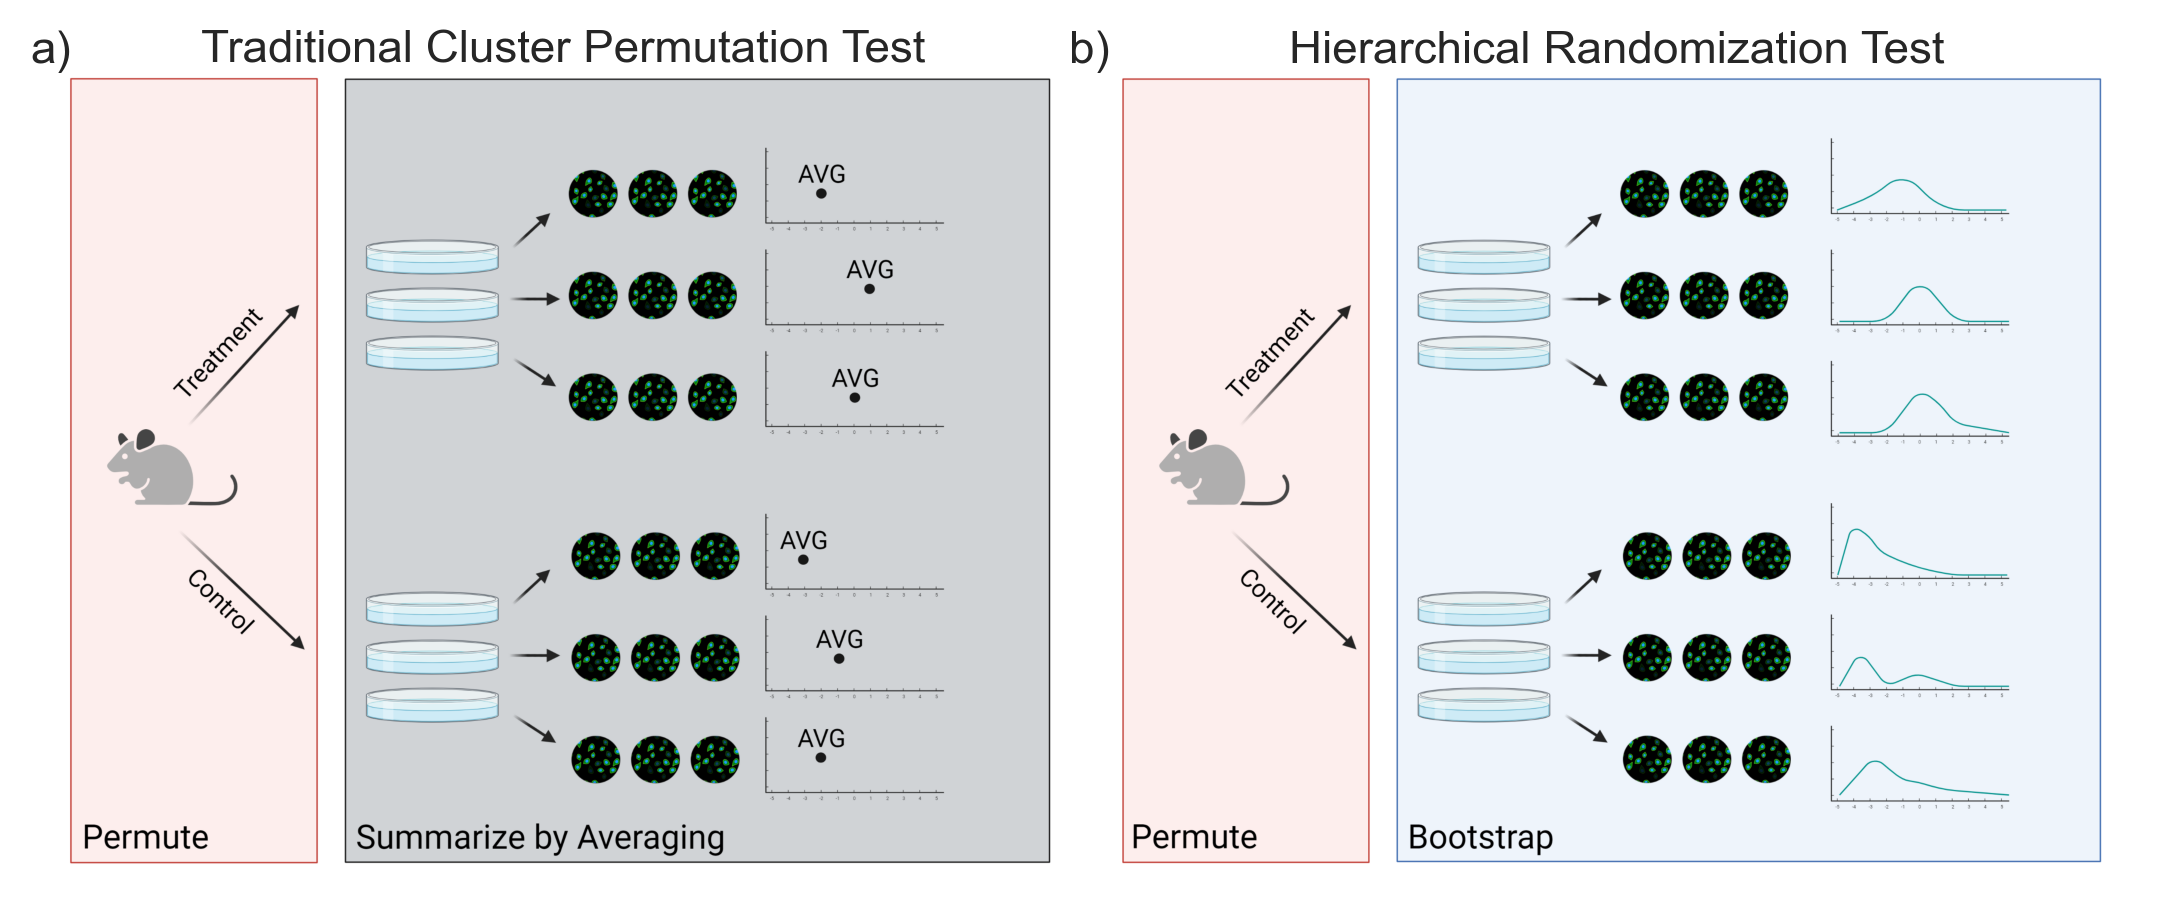

In [27]:
SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("white")
#sns.set(font="Times New Roman")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 9,4
#plt.style.use('seaborn-white')
f, axes = plt.subplots(1,2)
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = .9, wspace = 0.01, hspace = 0.3)
axes[0].imshow(before)
axes[0].axis('off')
axes[1].imshow(after)
axes[1].axis('off')

f.text(0.32, 0.85, "Traditional Cluster Permutation Test",
       ha="center", va="center", size=SMALL_SIZE)
f.text(0.71, 0.85, "Hierarchical Randomization Test",
       ha="center", va="center", size=SMALL_SIZE)

f.text(0.13, 0.85, "a)",
       ha="center", va="center", size=SMALL_SIZE)
f.text(0.515, 0.85, "b)",
       ha="center", va="center", size=SMALL_SIZE)

plt.savefig(os.path.abspath("scheme 3\\scheme 3.png"))

In [28]:

parameters = [[0, 10], [stats.norm, 0, 1], [stats.lognorm, 1, 0, 10]]
hierarchy = [2, 3, 3]

sim = DataSimulator(parameters, random_state=1)
sim.fit(hierarchy)

data = sim.generate()
data[9:,1] = [4]*3 + [5]*3 + [6]*3
plot_data = pd.DataFrame(data, columns=["Treatment", "Well", "Field", "Fluorescence"])
plot_data['Well'] = plot_data['Well'].astype(int)
plot_data['Treatment'] = plot_data['Treatment'].astype(int)

p_trad, null_trad = ha.stats.hypothesis_test(plot_data, 0, bootstraps=1, permutations='all', return_null=True)
p_ha, null_ha = ha.stats.hypothesis_test(plot_data, 0, bootstraps=1000, permutations='all', return_null=True)

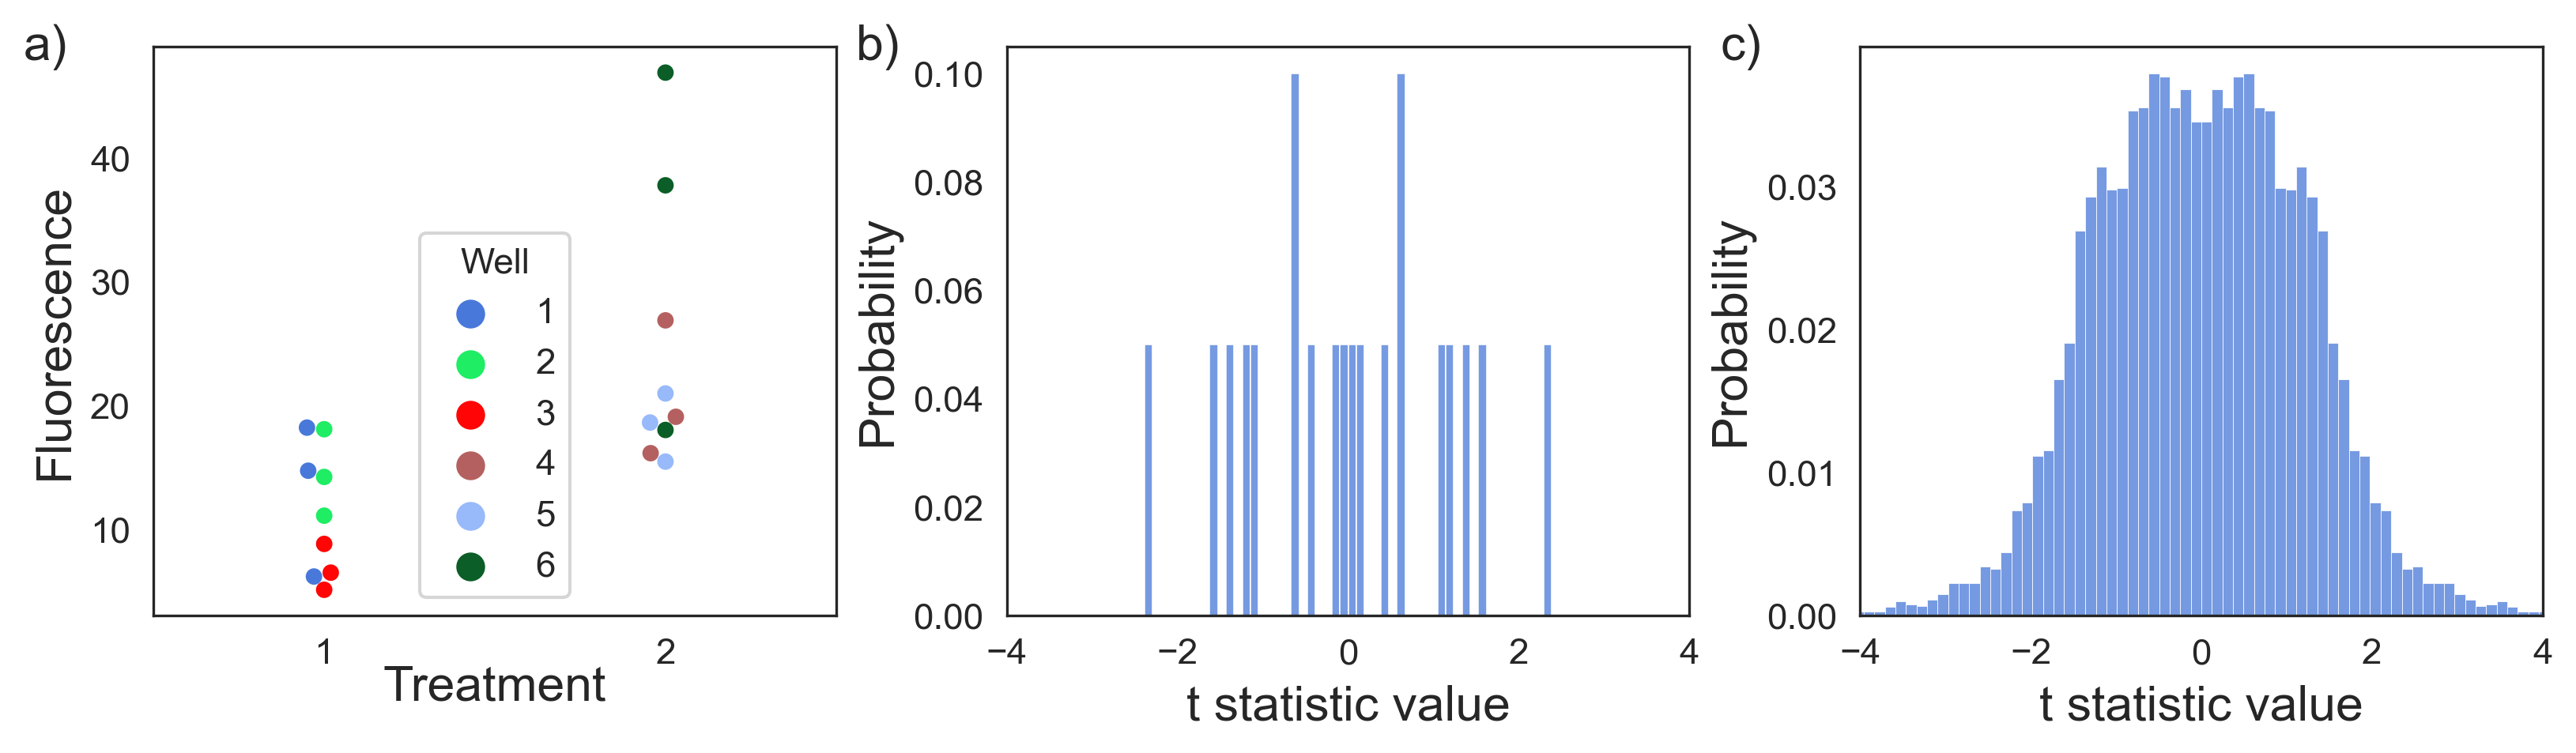

In [29]:
SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("white")
#sns.set(font="Times New Roman")
plt.rcParams['figure.dpi'] = 300
#plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = 13, 3

f, axes = plt.subplots(1,3)


plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = .9, wspace = 0.25, hspace = .20)

sns.swarmplot(data=plot_data, x='Treatment', y='Fluorescence', hue='Well', ax=axes[0])
axes[0].set_ylabel("Fluorescence")
axes[0].set_xlabel("Treatment", labelpad=-2)

sns.histplot(data=null_trad, bins=50, stat="probability", ax=axes[1])
axes[1].set_xlabel("t statistic value")
axes[1].set_xlim(-4, 4)

sns.histplot(data=null_ha, bins=100, stat="probability", ax=axes[2])
axes[2].set_xlabel("t statistic value")
axes[2].set_xlim(-4, 4)

f.text(0.09, 0.9, "a)",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.36, 0.9, "b)",
       ha="center", va="center", size=MEDIUM_SIZE)

f.text(0.64, 0.9, "c)",
       ha="center", va="center", size=MEDIUM_SIZE)


plt.savefig(os.path.abspath("figure 1\\figure 1.png"), dpi=f.dpi, bbox_inches="tight")

In [30]:
experimental_design = plt.imread(os.path.abspath('figure 2\\fig 2 resample.png'))

table = plt.imread(os.path.abspath('figure 2\\fig 2 table.png'))

parameters = [[0, 1], [stats.norm, 0, 1], [stats.lognorm, 1, 0, 1]]
hierarchy = [2, 4, 500]

sim = DataSimulator(parameters, random_state=1)
sim.fit(hierarchy)

data = sim.generate()
#data[2000:,1] = [5]*500 + [6]*500 + [7]*500 + [8]*500
plot_data = pd.DataFrame(data, columns=["Condition", "Mouse", "Trial", "Duration"])
plot_data['Mouse'] = plot_data['Mouse'].astype(int)
plot_data['Condition'] = plot_data['Condition'].astype(int)
plot_data['Condition'] = plot_data['Condition'].replace({1: "Control", 2: "+Treatment"})

p_ha, null_ha = ha.stats.hypothesis_test(plot_data, 0, bootstraps=1000, permutations='all', return_null=True)
print(p_ha)

aggregator = ha.internal_functions.GroupbyMean()
test = aggregator.fit_transform(data)
a, b = ha.internal_functions.nb_data_grabber(test, 0, (1, 2))
print(stats.ttest_ind(a, b))

0.038028571428571425
Ttest_indResult(statistic=-2.6415794391957923, pvalue=0.038459115717428764)


In [31]:
ha.stats.confidence_interval(data, 0, bootstraps=1000, permutations='all')

(-0.0793764670529844, 2.4426040348859255)

In [32]:
sample_a = sms.DescrStatsW(a)
sample_b = sms.DescrStatsW(b)

sms.CompareMeans(sample_b, sample_a).tconfint_diff(alpha=0.05, usevar="unequal")

(0.016630073202062334, 2.607289574677806)

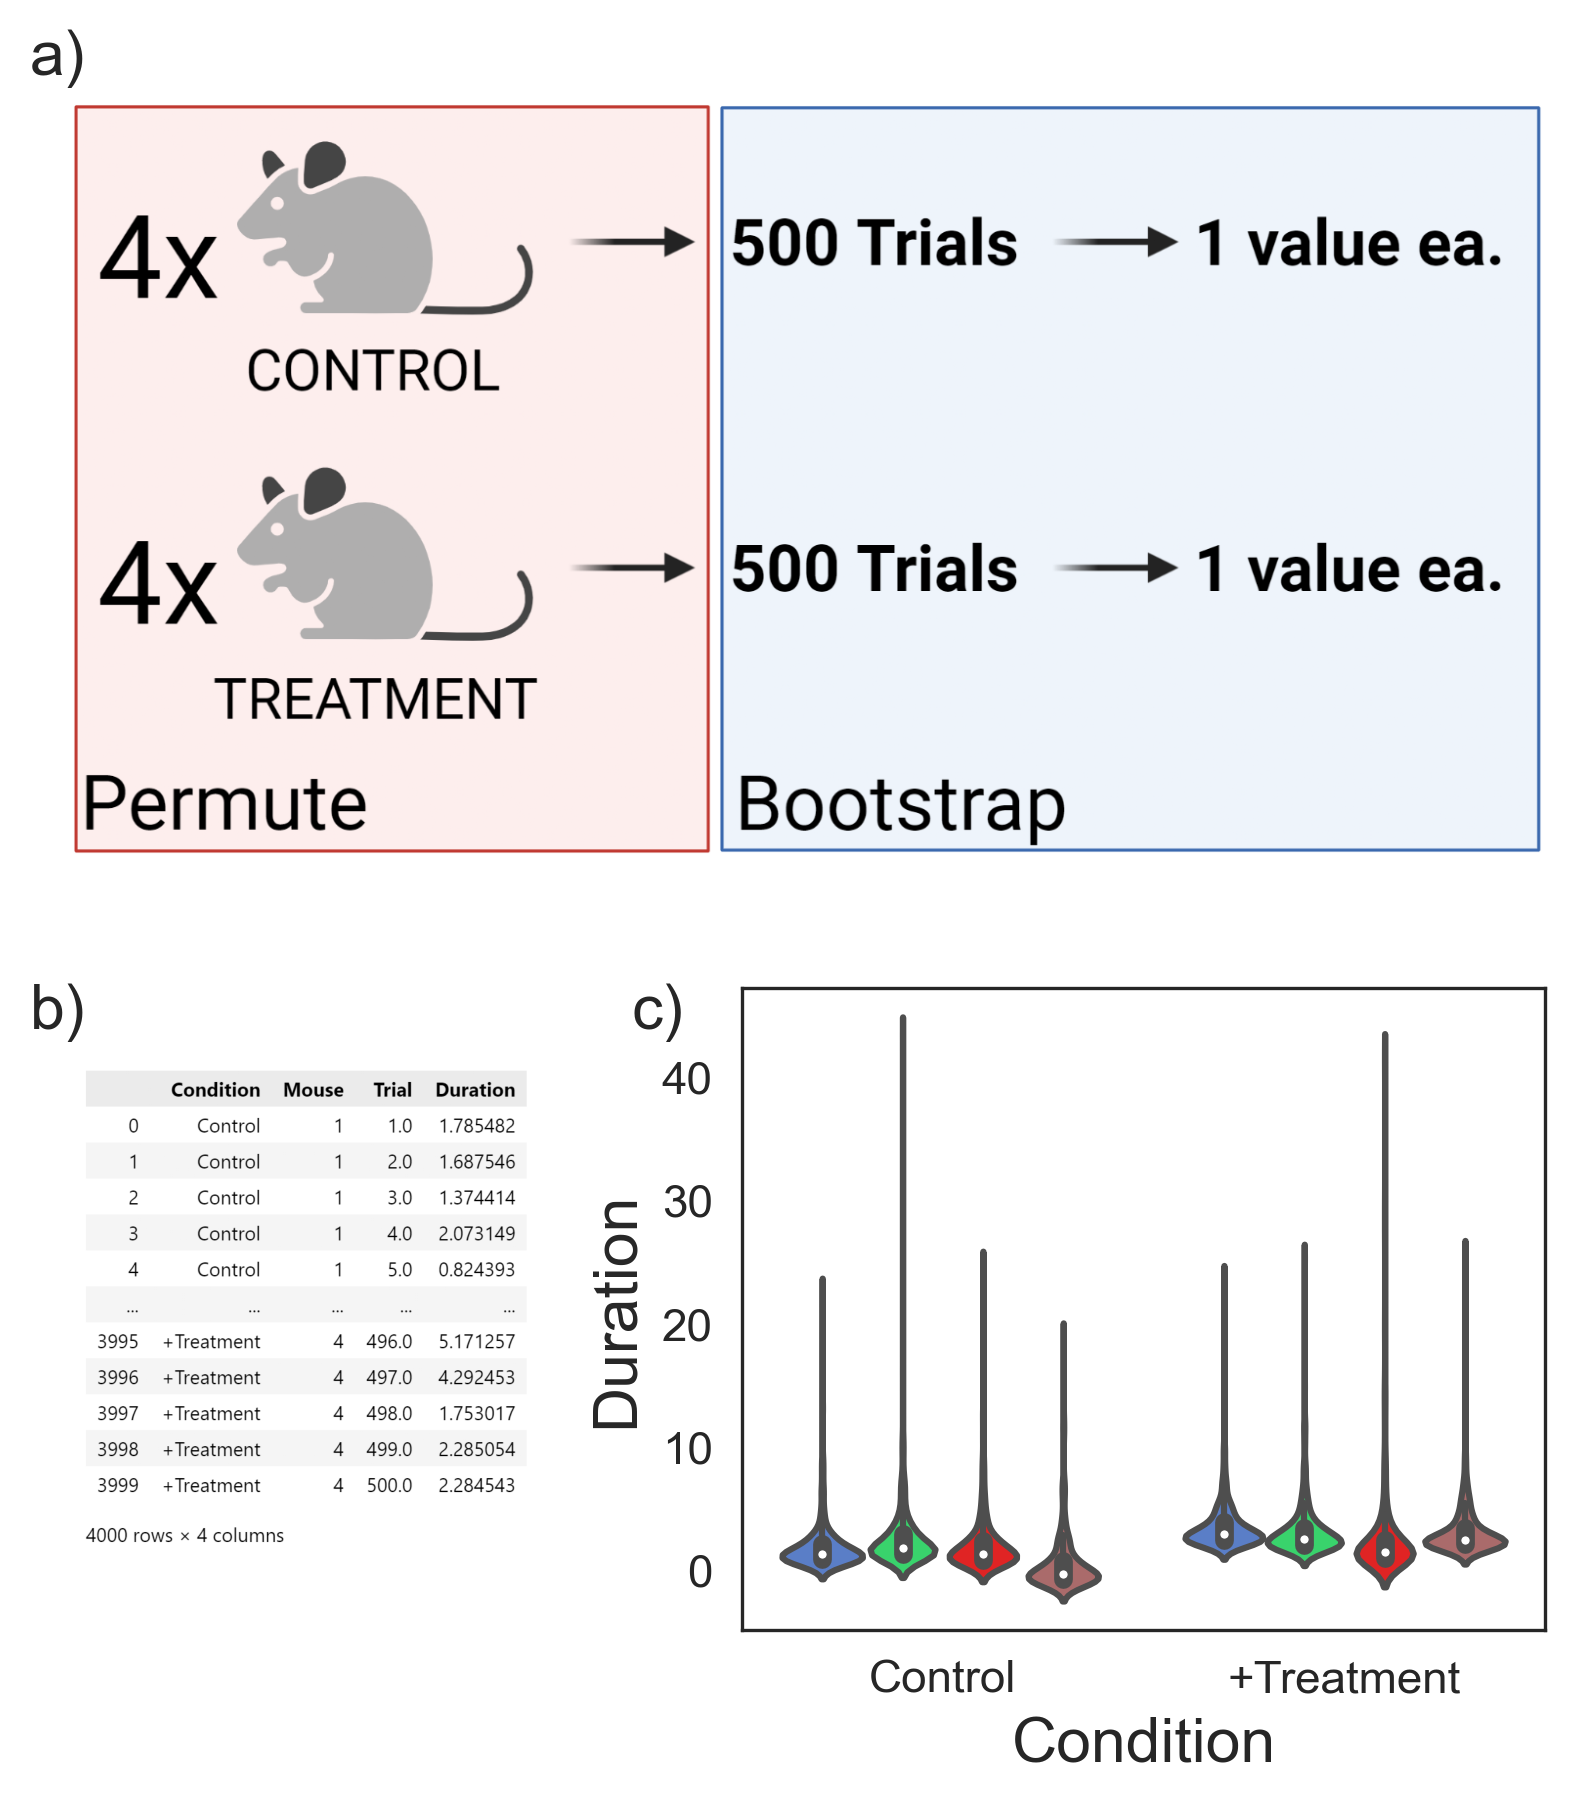

In [33]:
SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("white")
#sns.set(font="Times New Roman")
plt.rcParams['figure.dpi'] = 300
#plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = 5, 6
fig = plt.figure(constrained_layout=True)

gs = GridSpec(5, 5, figure=fig)
ax1 = fig.add_subplot(gs[:3, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[3:, 0:2])
ax3 = fig.add_subplot(gs[3:, 2:])


ax1.imshow(experimental_design)
ax1.axis('off')

ax2.imshow(table)
ax2.axis('off')

sns.violinplot(data=plot_data, x='Condition', y='Duration', hue='Mouse', ax=ax3, legend=None)
ax3.legend([],[], frameon=False)

fig.text(0., 0.96, "a)",
       ha="center", va="center", size=MEDIUM_SIZE)
fig.text(0., 0.43, "b)",
       ha="center", va="center", size=MEDIUM_SIZE)

fig.text(0.4, 0.43, "c)",
       ha="center", va="center", size=MEDIUM_SIZE)


plt.savefig(os.path.abspath("figure 2\\figure 2.png"), dpi=fig.dpi, bbox_inches="tight")

In [34]:
experimental_design = plt.imread(os.path.abspath('figure 3\\fixed effect.png'))

parameters = [[stats.norm, 0, 11], [5, 0]*3, [stats.lognorm, 1, 0, 5], [stats.lognorm, 1, 0, 1]]
hierarchy = [3, 2, 3, 3]

sim = DataSimulator(parameters, random_state=2)
sim.fit(hierarchy)

data = sim.generate()
#data[2000:,1] = [5]*500 + [6]*500 + [7]*500 + [8]*500
plot_data = pd.DataFrame(data, columns=["Mouse", "Condition", "Well", "Cell", "Firing Rate"])
plot_data['Mouse'] = plot_data['Mouse'].astype(int)
plot_data['Well'] = plot_data['Well'].astype(int)
plot_data['Condition'] = plot_data['Condition'].astype(int)
plot_data['Condition'] = plot_data['Condition'].replace({1: "Control", 2: "+Treatment"})

p_ha, null_ha = ha.stats.hypothesis_test(plot_data, 1, bootstraps=100, permutations=4000, return_null=True)
print(p_ha)

aggregator = ha.internal_functions.GroupbyMean()
test = aggregator.fit_transform(data)
a, b = ha.internal_functions.nb_data_grabber(test, 1, (2, 1))
print(stats.ttest_ind(a, b))

0.027055
Ttest_indResult(statistic=-1.7386151040961026, pvalue=0.10130420497129865)


In [35]:
ha.stats.confidence_interval(plot_data, 1, compare="corr", bootstraps=100, permutations=1000)

(0.3895938039210085, 14.134514638234402)

In [36]:
sample_a = sms.DescrStatsW(a)
sample_b = sms.DescrStatsW(b)

sms.CompareMeans(sample_b, sample_a).tconfint_diff(alpha=0.05, usevar="unequal")

(-2.0091537563988995, 17.305492984236043)

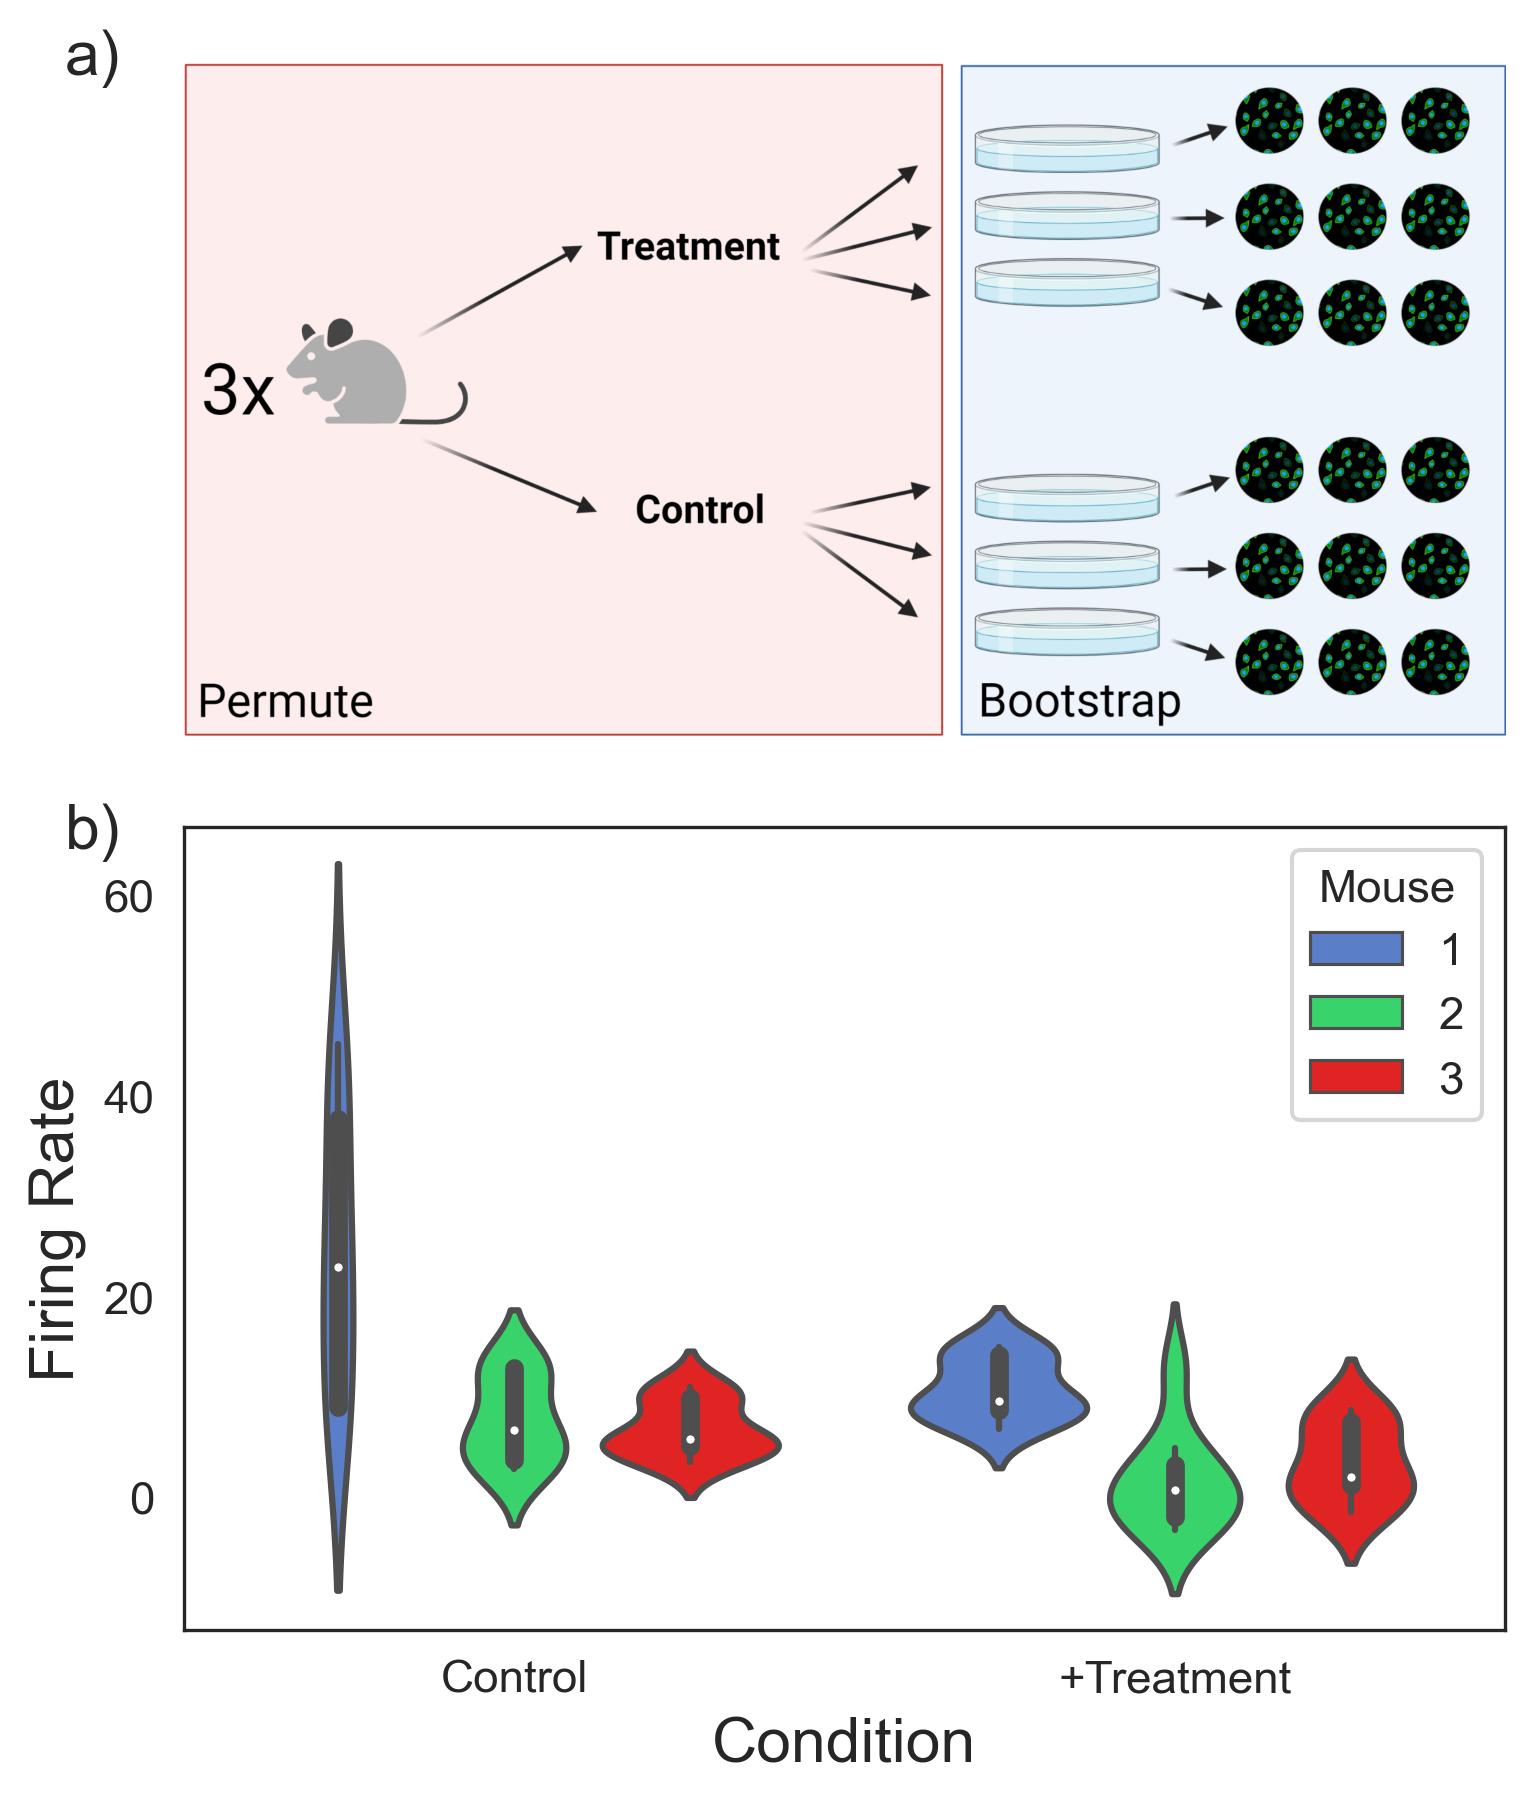

In [37]:
SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("white")
#sns.set(font="Times New Roman")
plt.rcParams['figure.dpi'] = 300
#plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = 5, 6
fig = plt.figure(constrained_layout=True)

gs = GridSpec(4, 4, figure=fig)
ax1 = fig.add_subplot(gs[:2, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax3 = fig.add_subplot(gs[2:, :])


ax1.imshow(experimental_design)
ax1.axis('off')

sns.violinplot(data=plot_data, x='Condition', y='Firing Rate', hue='Mouse', ax=ax3, legend="auto")
#ax3.legend([],[], frameon=False)

fig.text(0.05, 0.96, "a)",
       ha="center", va="center", size=MEDIUM_SIZE)
fig.text(0.05, 0.53, "b)",
       ha="center", va="center", size=MEDIUM_SIZE)

plt.savefig(os.path.abspath("figure 3\\figure 3.png"), dpi=fig.dpi, bbox_inches="tight")

In [38]:
experimental_design = plt.imread(os.path.abspath('figure 3\\random effect.png'))

table = plt.imread(os.path.abspath('figure 3\\interaction effect table.png'))


parameters = [[stats.norm, 0, 11], [5, 0]*3, [stats.lognorm, 1, 0, 5], [stats.lognorm, 1, 0, 1]]
hierarchy = [3, 2, 3, 3]

sim = DataSimulator(parameters, random_state=2)
sim.fit(hierarchy)

data = sim.generate()
#data[2000:,1] = [5]*500 + [6]*500 + [7]*500 + [8]*500
plot_data = pd.DataFrame(data, columns=["Mouse", "Condition", "Well", "Cell", "Firing Rate"])
plot_data['Mouse'] = plot_data['Mouse'].astype(int)
plot_data['Well'] = plot_data['Well'].astype(int)
plot_data['Condition'] = plot_data['Condition'].astype(int)
plot_data['Condition'] = plot_data['Condition'].replace({1: "Control", 2: "+Treatment"})

p_ha, null_ha = ha.stats.hypothesis_test(plot_data[["Mouse", "Condition", "Condition", "Well", "Cell", "Firing Rate"]], 1, bootstraps=1000, permutations=100, return_null=True)
print(p_ha)

0.12572


In [39]:
ha.stats.confidence_interval(plot_data[["Mouse", "Condition", "Condition", "Well", "Cell", "Firing Rate"]], 1, interval=90, bootstraps=1000, permutations=100, iterations=10)

(-10.305988265715282, 15.307681526730287)

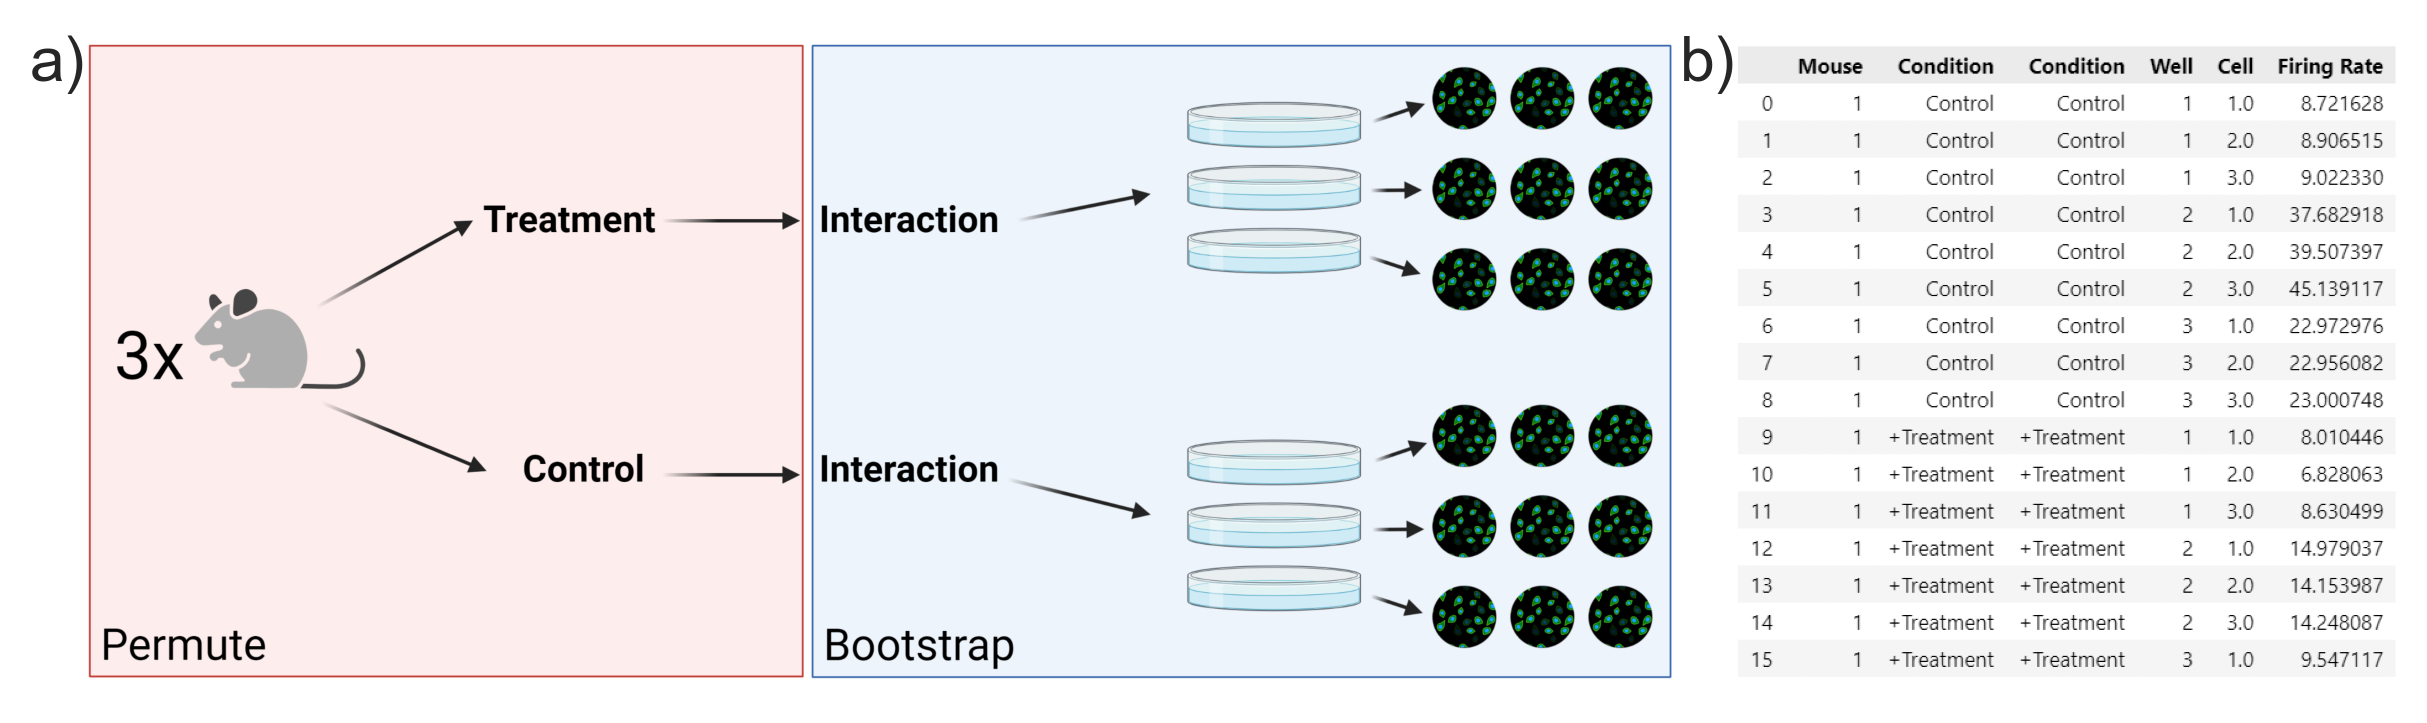

In [40]:
SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("white")
#sns.set(font="Times New Roman")
plt.rcParams['figure.dpi'] = 300
#plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = 10, 4
fig = plt.figure(constrained_layout=False)

gs = GridSpec(1, 10, figure=fig)
ax1 = fig.add_subplot(gs[0, :7])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax3 = fig.add_subplot(gs[0, 7:])


ax1.imshow(experimental_design)
ax1.axis('off')

ax3.imshow(table)
ax3.axis('off')

fig.text(0.12, 0.75, "a)",
       ha="center", va="center", size=MEDIUM_SIZE)
fig.text(0.67, 0.75, "b)",
       ha="center", va="center", size=MEDIUM_SIZE)

plt.savefig(os.path.abspath("figure 3\\figure 4.png"), dpi=fig.dpi, bbox_inches="tight")

In [41]:
experimental_design = plt.imread(os.path.abspath('figure 5\\design.png'))


parameters = [[stats.norm, 10, 11], [0, 2, 4, 6]*4, [stats.lognorm, 1, 0, 6], [stats.lognorm, 0.5, 0, 1]]
hierarchy = [4, 4, 1, 500]

sim = DataSimulator(parameters, random_state=1)
sim.fit(hierarchy)

data = sim.generate()
#data[2000:,1] = [5]*500 + [6]*500 + [7]*500 + [8]*500
plot_data = pd.DataFrame(data, columns=["Mouse", "Day", "Interaction", "Trial", "Population Effect"])
plot_data['Mouse'] = plot_data['Mouse'].astype(int)
plot_data['Interaction'] = plot_data['Interaction'].astype(int)
plot_data['Day'] = plot_data['Day'].astype(int)

p_ha, null_ha = ha.stats.hypothesis_test(plot_data, 1, bootstraps=100, permutations=1000, return_null=True)
print(p_ha)

0.0236


In [42]:
ha.stats.confidence_interval(plot_data, 1, bootstraps=100, permutations=1000)

(0.4617904907339123, 3.6511520676578524)

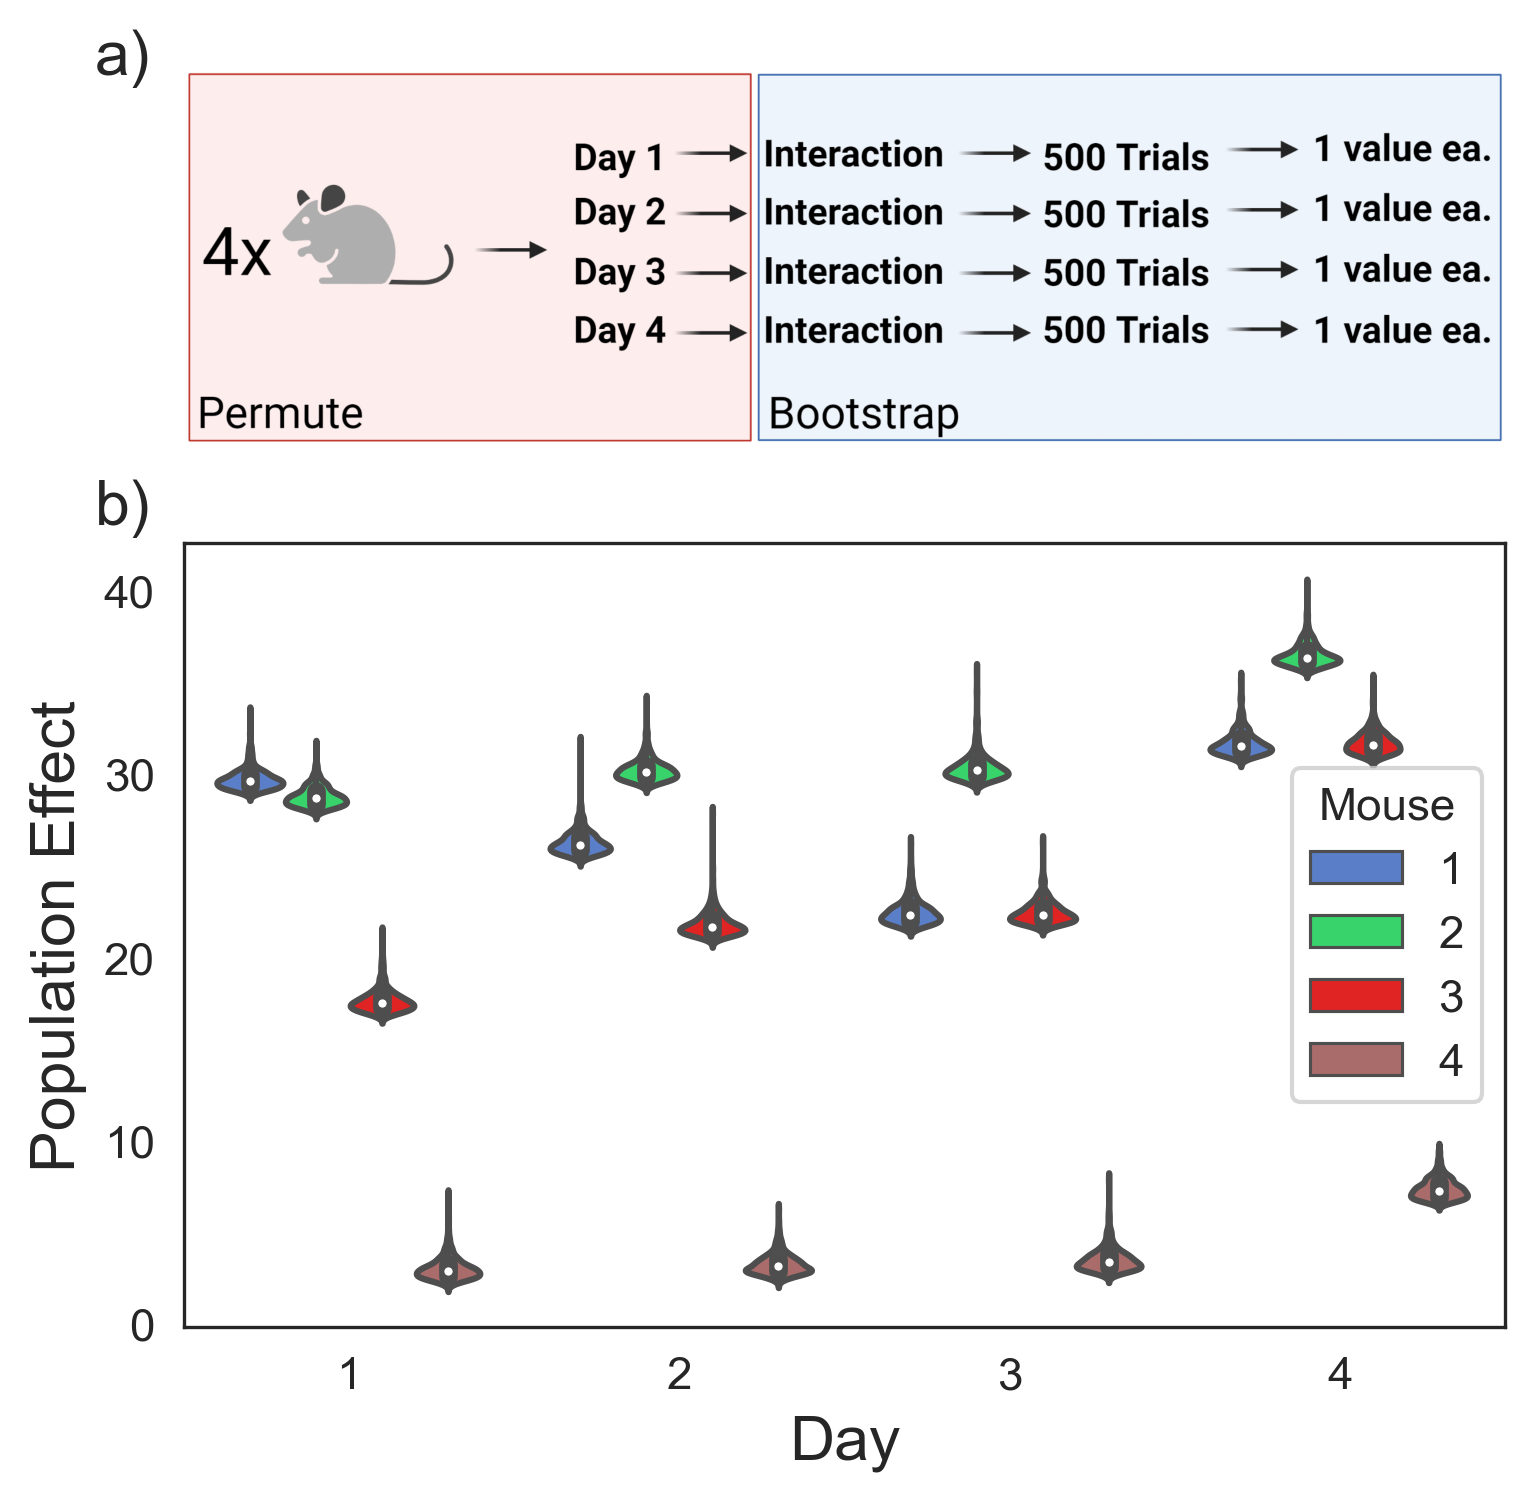

In [43]:
SMALL_SIZE = 11
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("white")
#sns.set(font="Times New Roman")
plt.rcParams['figure.dpi'] = 300
#plt.style.use('seaborn-white')

plt.rcParams['figure.figsize'] = 5, 5
fig = plt.figure(constrained_layout=True)

gs = GridSpec(5, 1, figure=fig)
ax1 = fig.add_subplot(gs[:2, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax3 = fig.add_subplot(gs[2:, :])


ax1.imshow(experimental_design)
ax1.axis('off')

sns.violinplot(data=plot_data, x='Day', y='Population Effect', hue='Mouse', ax=ax3, legend="auto")
#ax3.legend([],[], frameon=False)

fig.text(0.07, 0.95, "a)",
       ha="center", va="center", size=MEDIUM_SIZE)
fig.text(0.07, 0.65, "b)",
       ha="center", va="center", size=MEDIUM_SIZE)

plt.savefig(os.path.abspath("figure 5\\figure 5.png"), dpi=fig.dpi, bbox_inches="tight")




In [44]:
from pathlib import Path
import matplotlib

base_dir = Path(os.path.abspath('simulations//hierarch size control_t'))
csvs = list(base_dir.glob('*.csv'))
#csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Intraclass Correlation', 'Hierarch', "Welch's t", "Student's t"]) for file in csvs]
for df in df_list:
    df['Intraclass Correlation'] /= (df['Intraclass Correlation'] + 1)
    df.set_index("Intraclass Correlation", inplace=True)
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

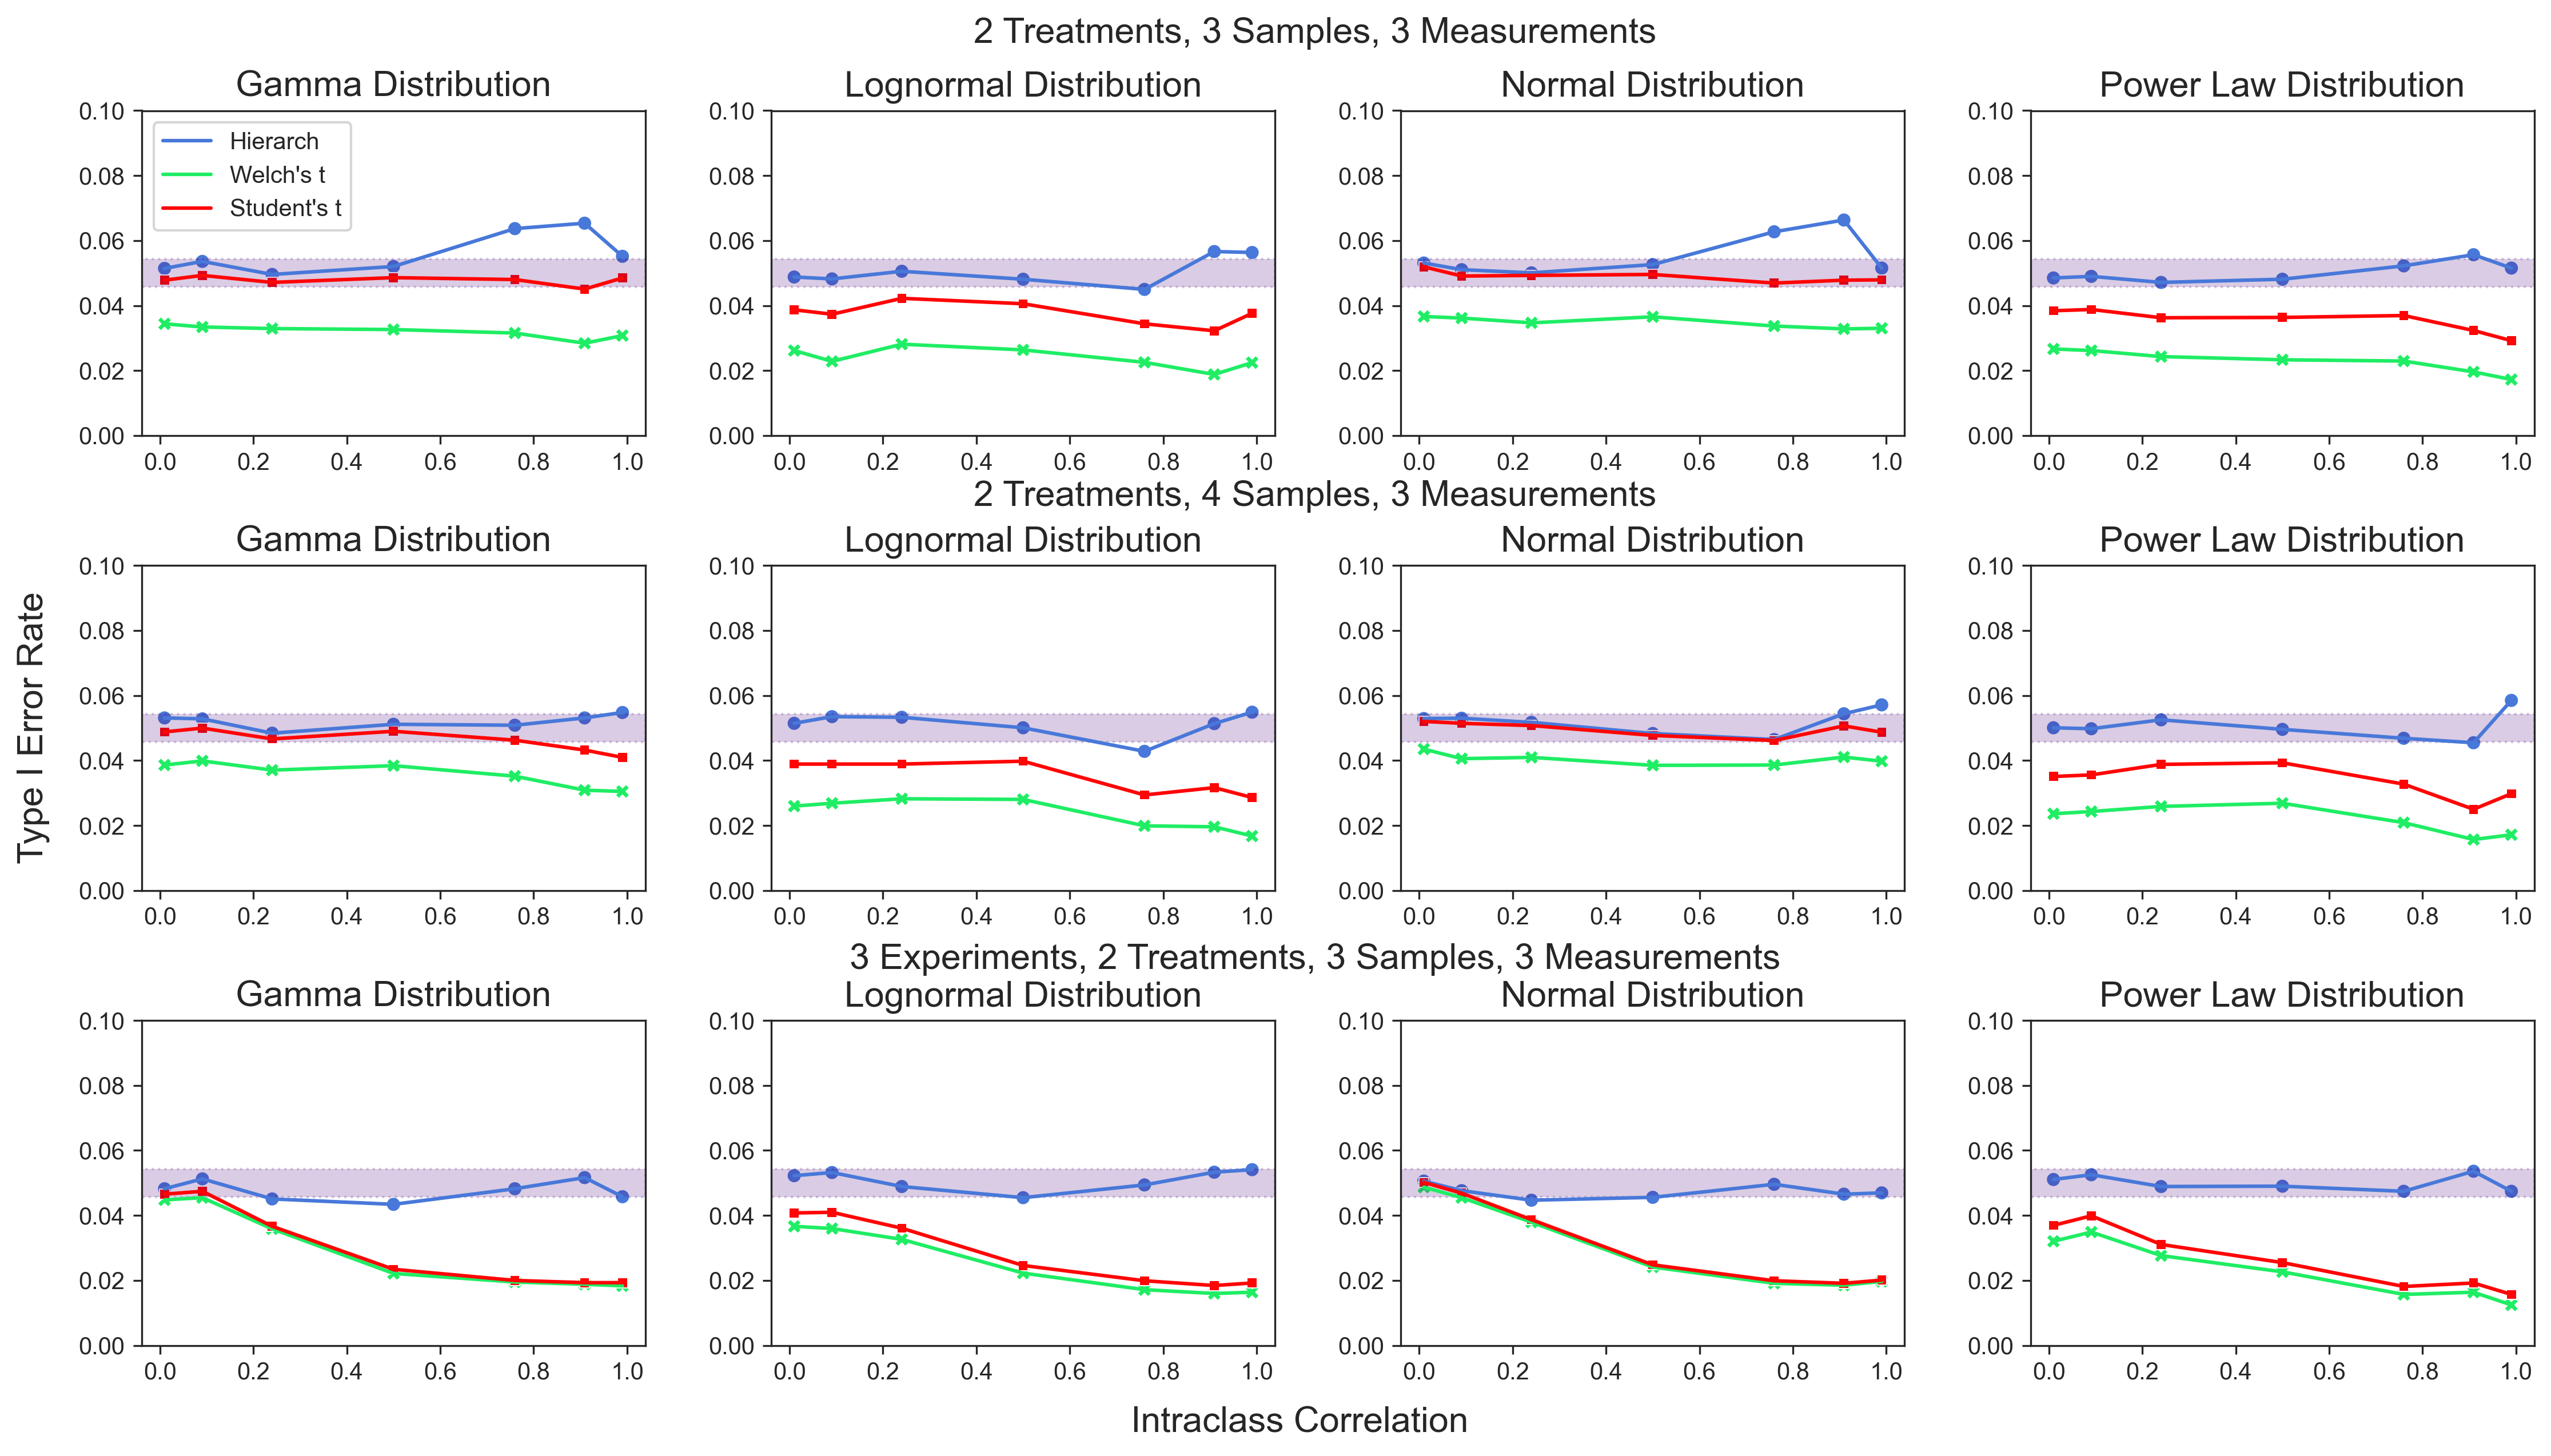

In [45]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.4)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.0, 0.1)
    axes.flat[idx].axhspan(0.0457, 0.0543, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95, "2 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, "2 Treatments, 4 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, "3 Experiments, 2 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "Intraclass Correlation", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Type I Error Rate",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 6\\figure 6.png"), dpi=300, bbox_inches="tight")

In [46]:
from pathlib import Path
import matplotlib

base_dir = Path(os.path.abspath('simulations//size control corr'))
csvs = list(base_dir.glob('*.csv'))
#csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Intraclass Correlation', 'Hierarch', "Wald test"]) for file in csvs]
for df in df_list:
    df['Intraclass Correlation'] /= (df['Intraclass Correlation'] + 1)
    df.set_index("Intraclass Correlation", inplace=True)
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

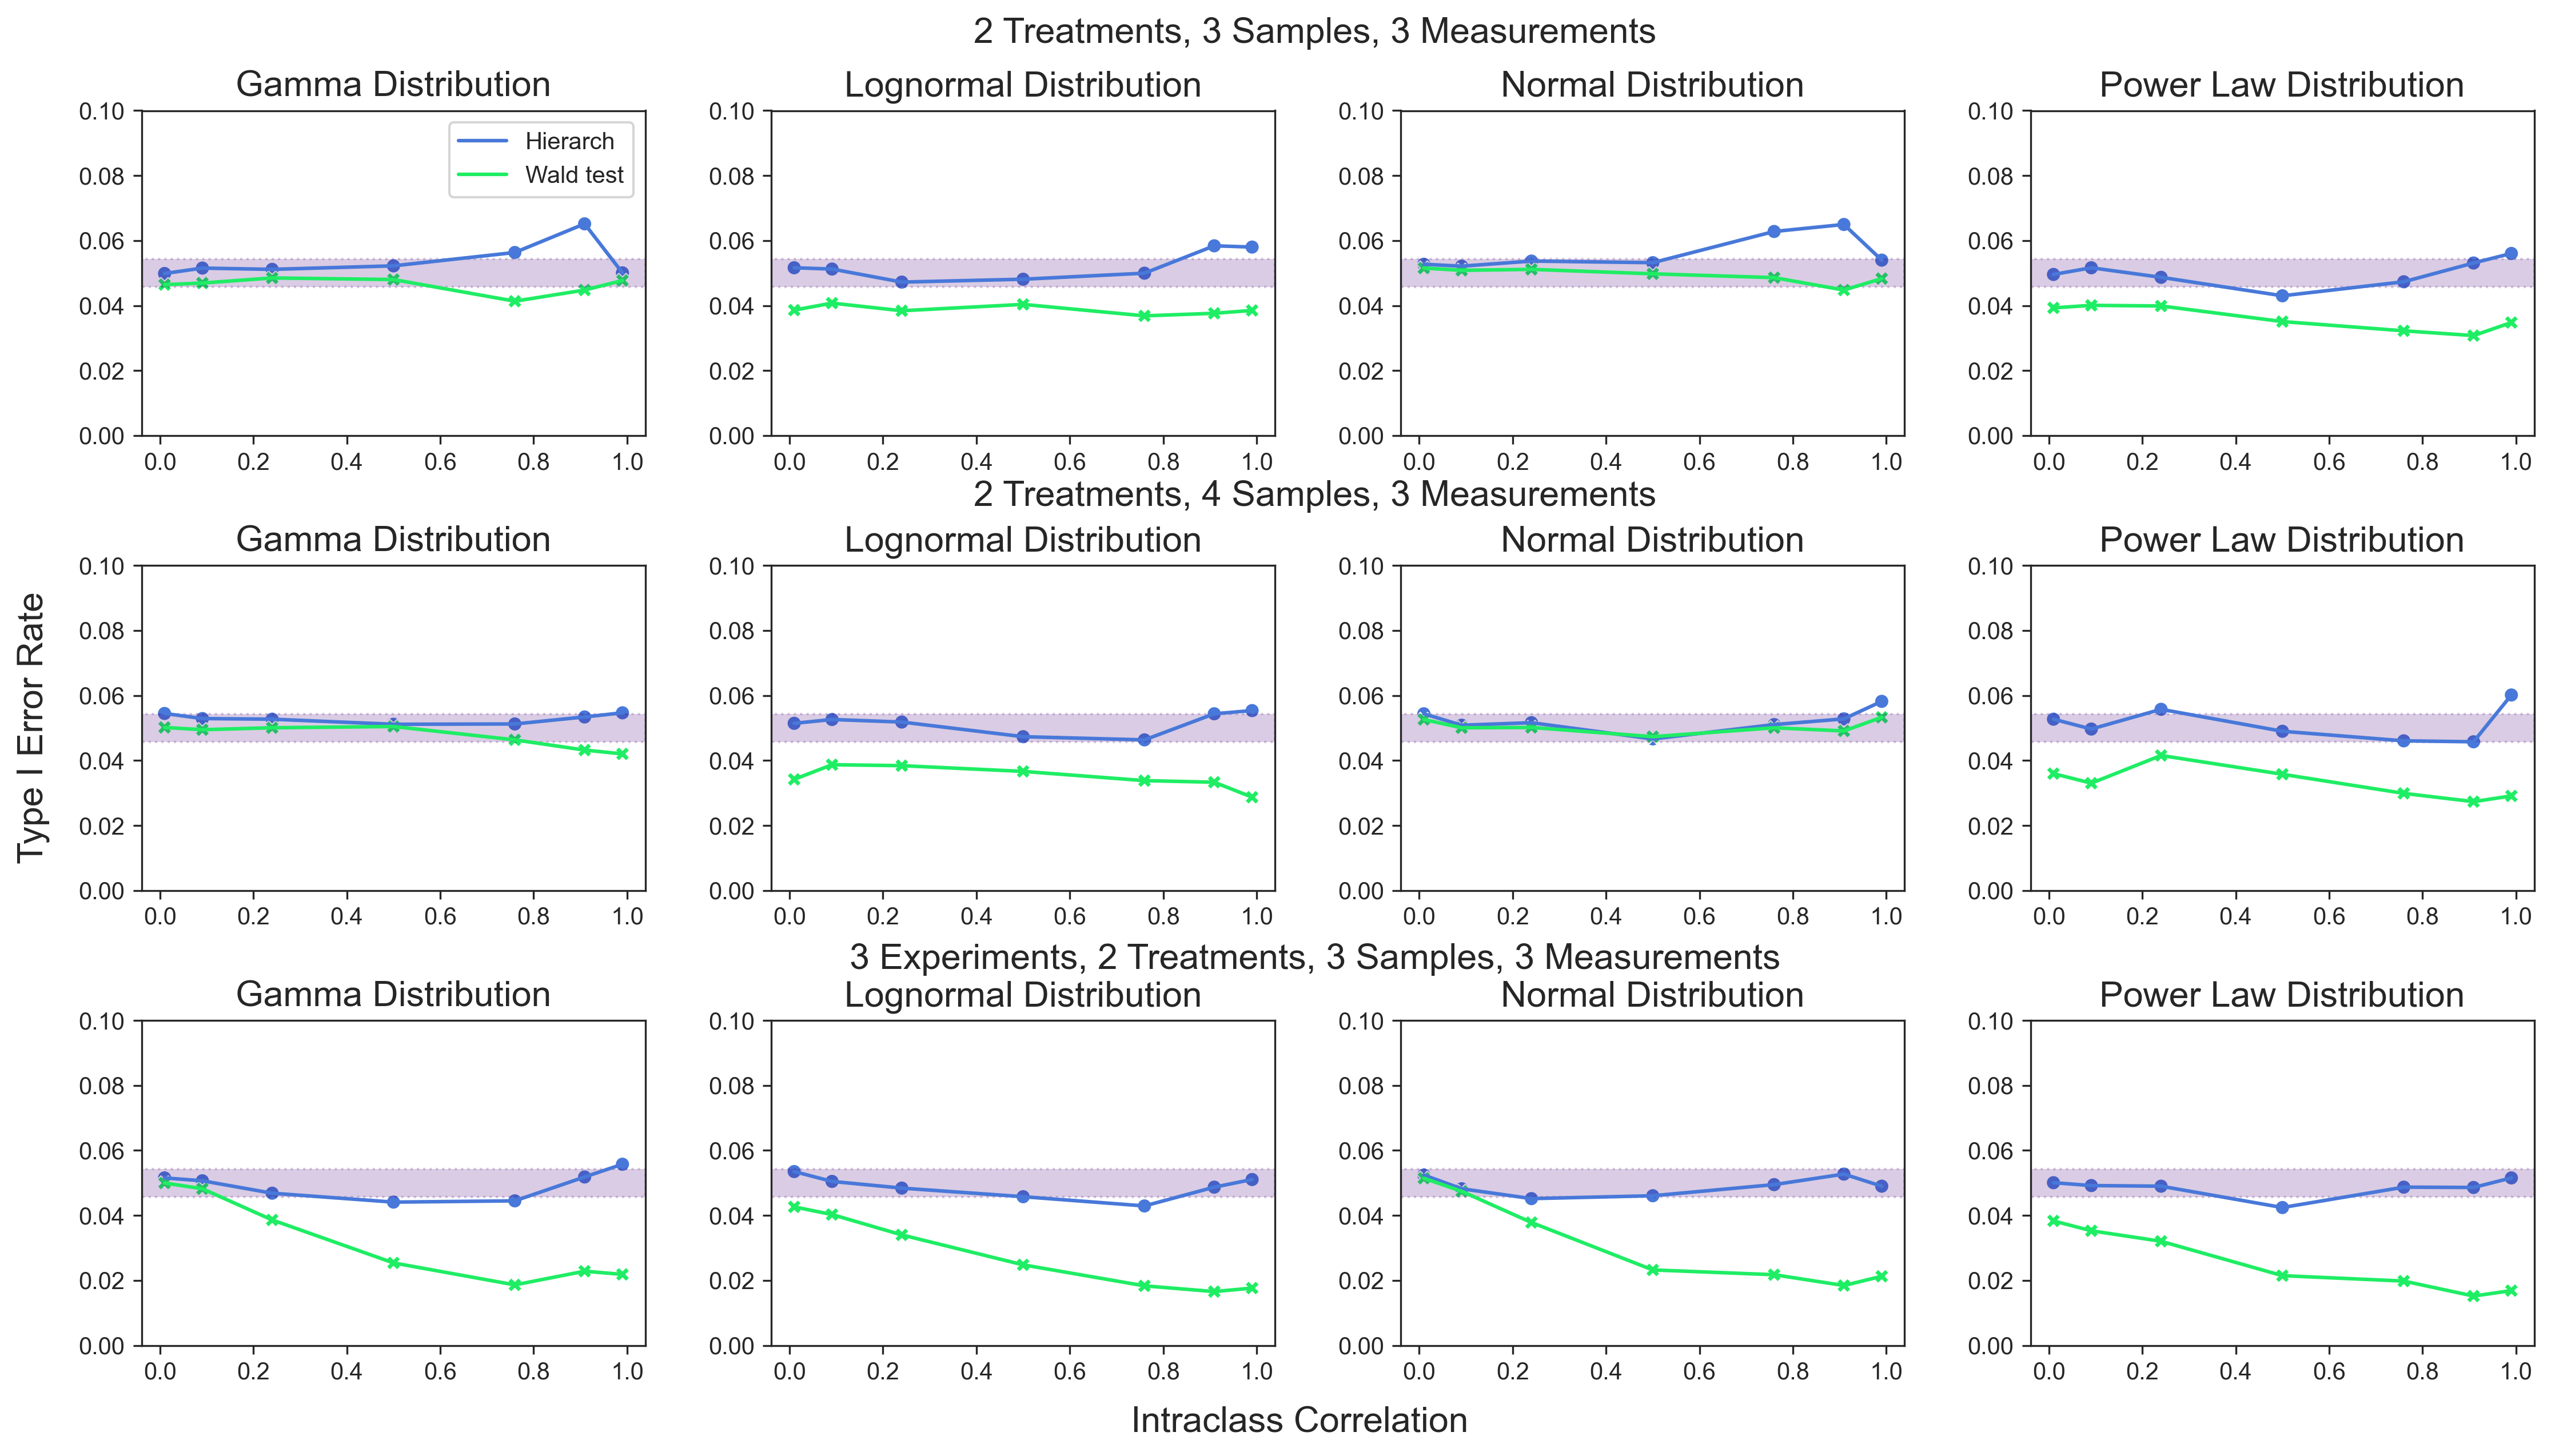

In [47]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.4)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.0, 0.1)
    axes.flat[idx].axhspan(0.0457, 0.0543, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95, "2 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, "2 Treatments, 4 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, "3 Experiments, 2 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "Intraclass Correlation", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Type I Error Rate",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 7\\figure 7.png"), dpi=300, bbox_inches="tight")

In [48]:
from pathlib import Path
import matplotlib

base_dir = Path(os.path.abspath('simulations//hierarch size control_t var'))
csvs = list(base_dir.glob('*.csv'))
#csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Intraclass Correlation', 'Hierarch', "Welch's t", "Student's t"]) for file in csvs]
for df in df_list:
    df['Intraclass Correlation'] /= (df['Intraclass Correlation'] + 1)
    df.set_index("Intraclass Correlation", inplace=True)
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

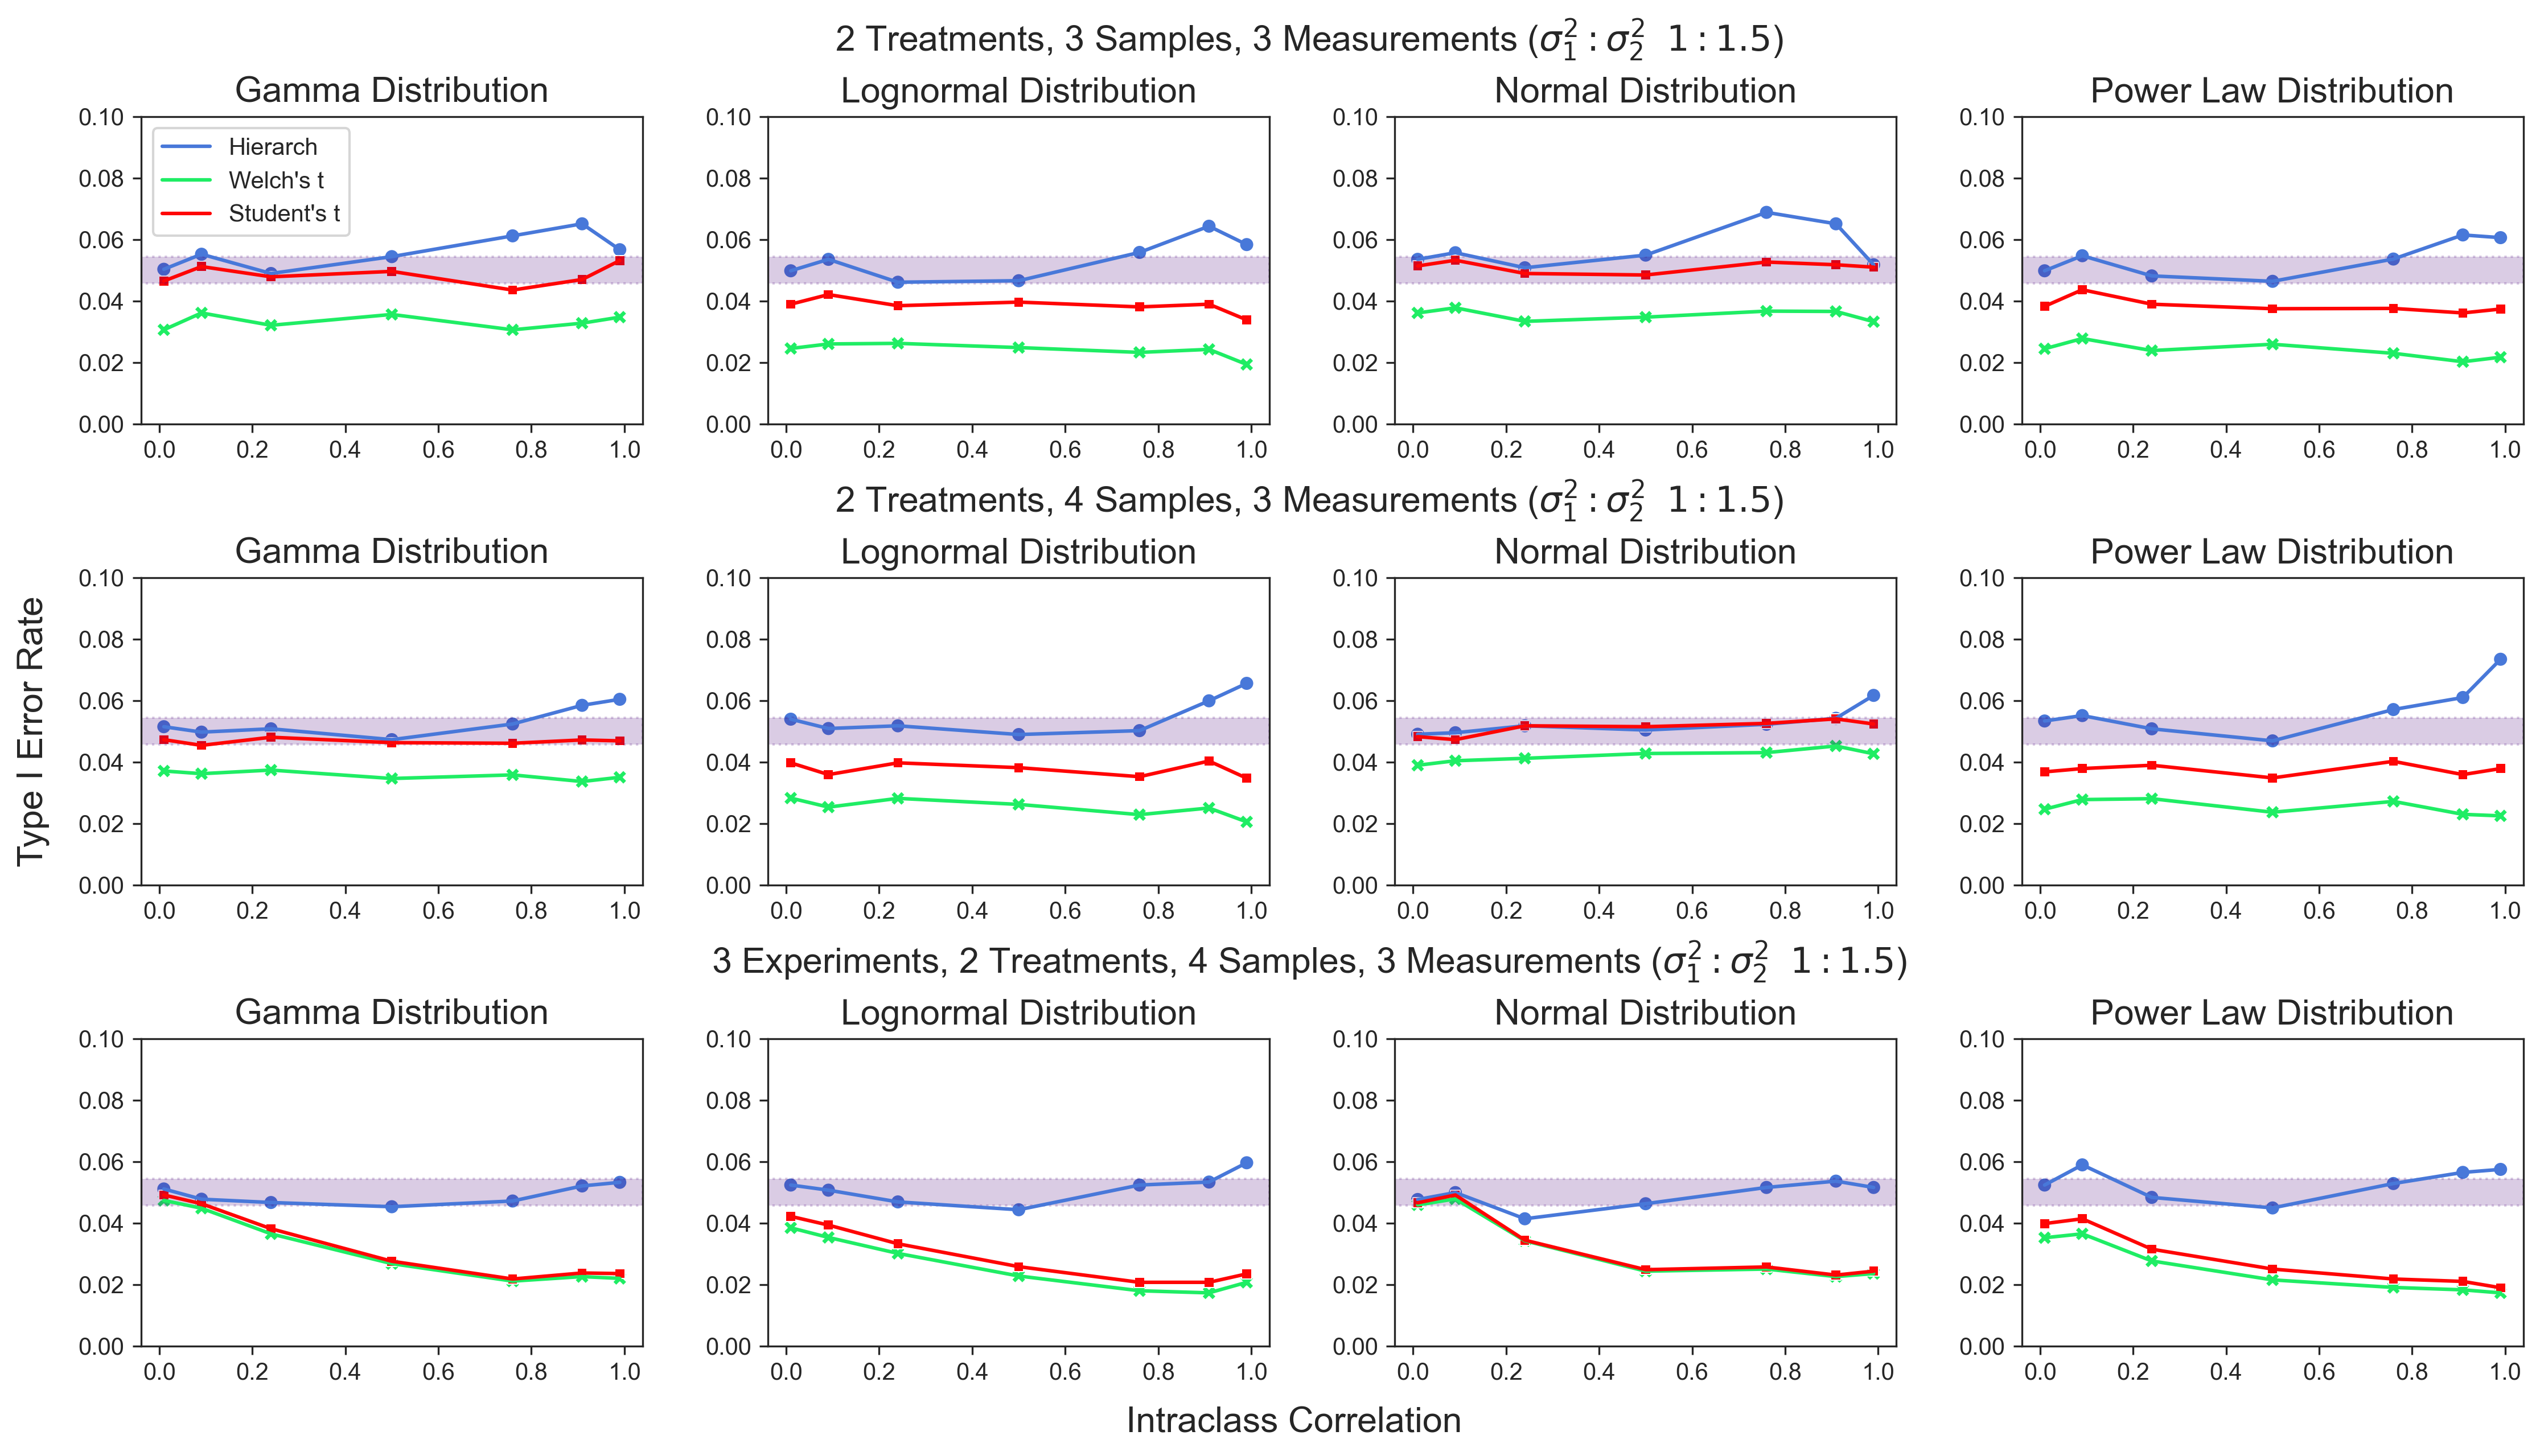

In [49]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.5)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.0, 0.1)
    axes.flat[idx].axhspan(0.0457, 0.0543, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95,  r"2 Treatments, 3 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}$  $1:1.5$)",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, r"2 Treatments, 4 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}$  $1:1.5$)",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, r"3 Experiments, 2 Treatments, 4 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}$  $1:1.5$)",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "Intraclass Correlation", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Type I Error Rate",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 8\\figure 8.png"), dpi=300, bbox_inches="tight")

In [50]:
from pathlib import Path
import matplotlib

base_dir = Path(os.path.abspath('simulations//size control corr unequal variance'))
csvs = list(base_dir.glob('*.csv'))
#csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Intraclass Correlation', 'Hierarch', "Wald test"]) for file in csvs]
for df in df_list:
    df['Intraclass Correlation'] /= (df['Intraclass Correlation'] + 1)
    df.set_index("Intraclass Correlation", inplace=True)
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

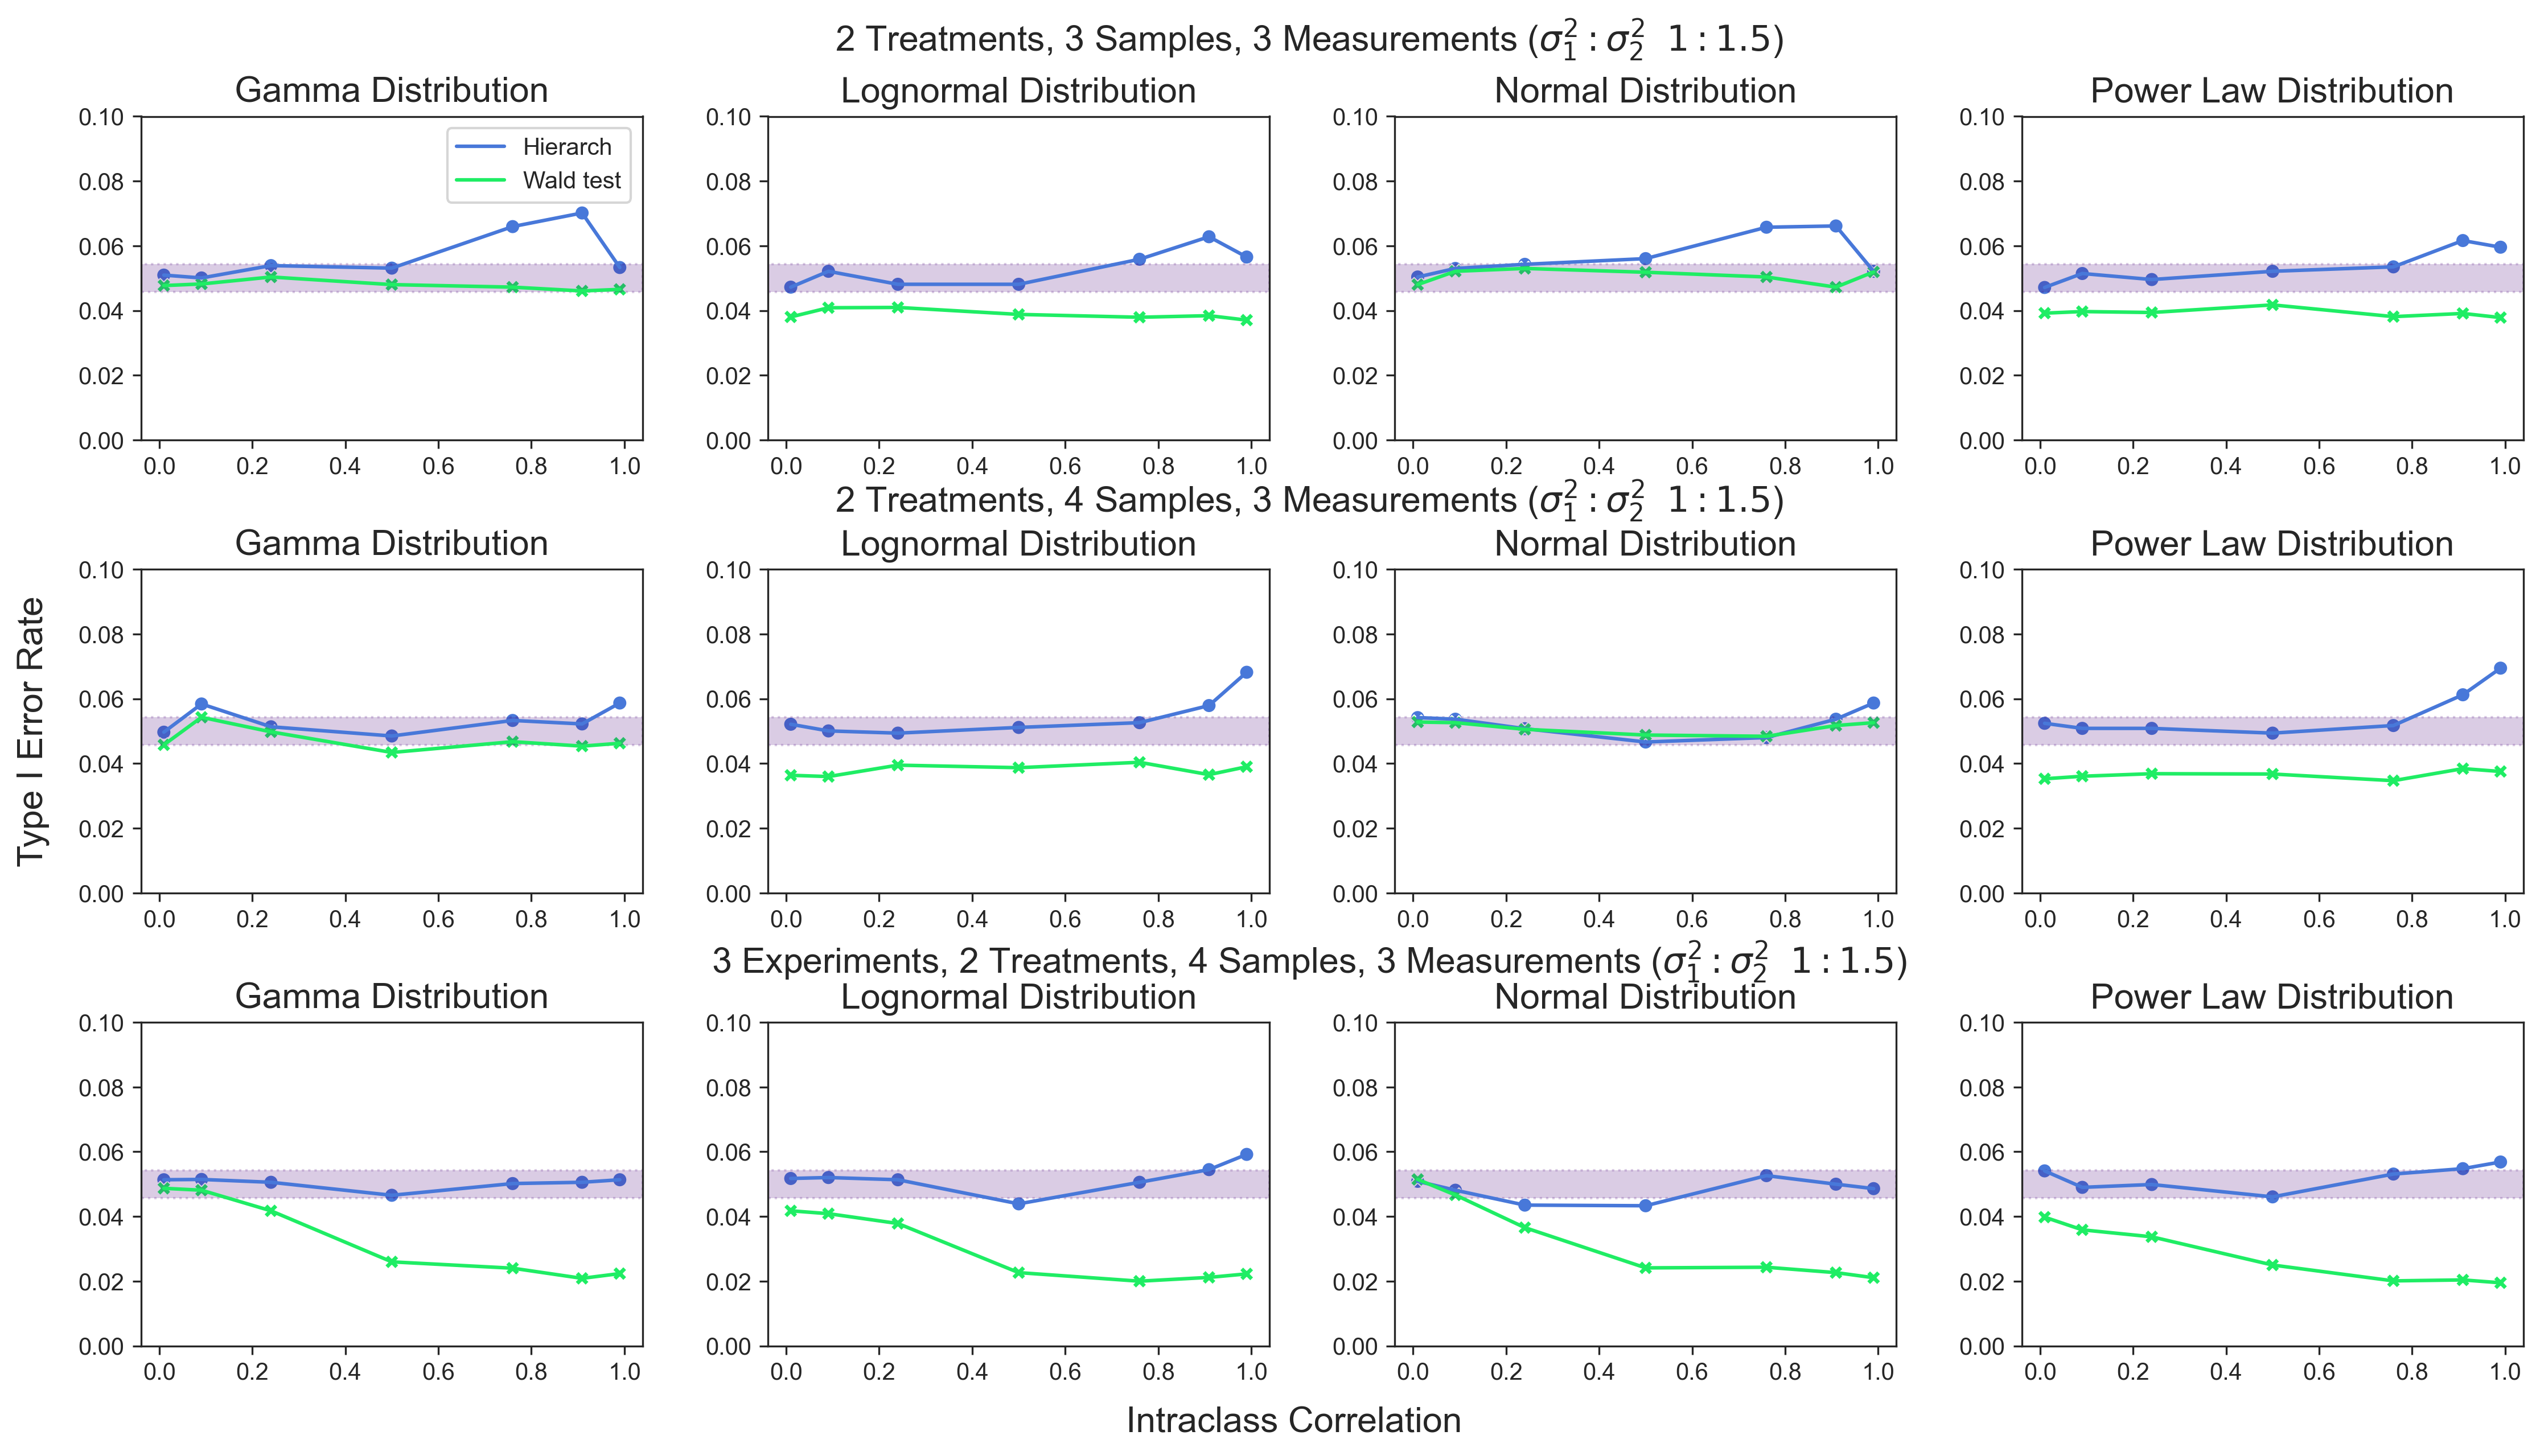

In [51]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.4)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.0, 0.1)
    axes.flat[idx].axhspan(0.0457, 0.0543, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95,  r"2 Treatments, 3 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}$  $1:1.5$)",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, r"2 Treatments, 4 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}$  $1:1.5$)",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, r"3 Experiments, 2 Treatments, 4 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}$  $1:1.5$)",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "Intraclass Correlation", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Type I Error Rate",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 9\\figure 9.png"), dpi=300, bbox_inches="tight")

In [52]:
from pathlib import Path
import matplotlib

base_dir = Path(os.path.abspath('simulations//size control corr many'))
csvs = list(base_dir.glob('*.csv'))
csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Intraclass Correlation', 'Hierarch', "Wald test"]) for file in csvs]
for df in df_list:
    df['Intraclass Correlation'] /= (df['Intraclass Correlation'] + 1)
    df.set_index("Intraclass Correlation", inplace=True)
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

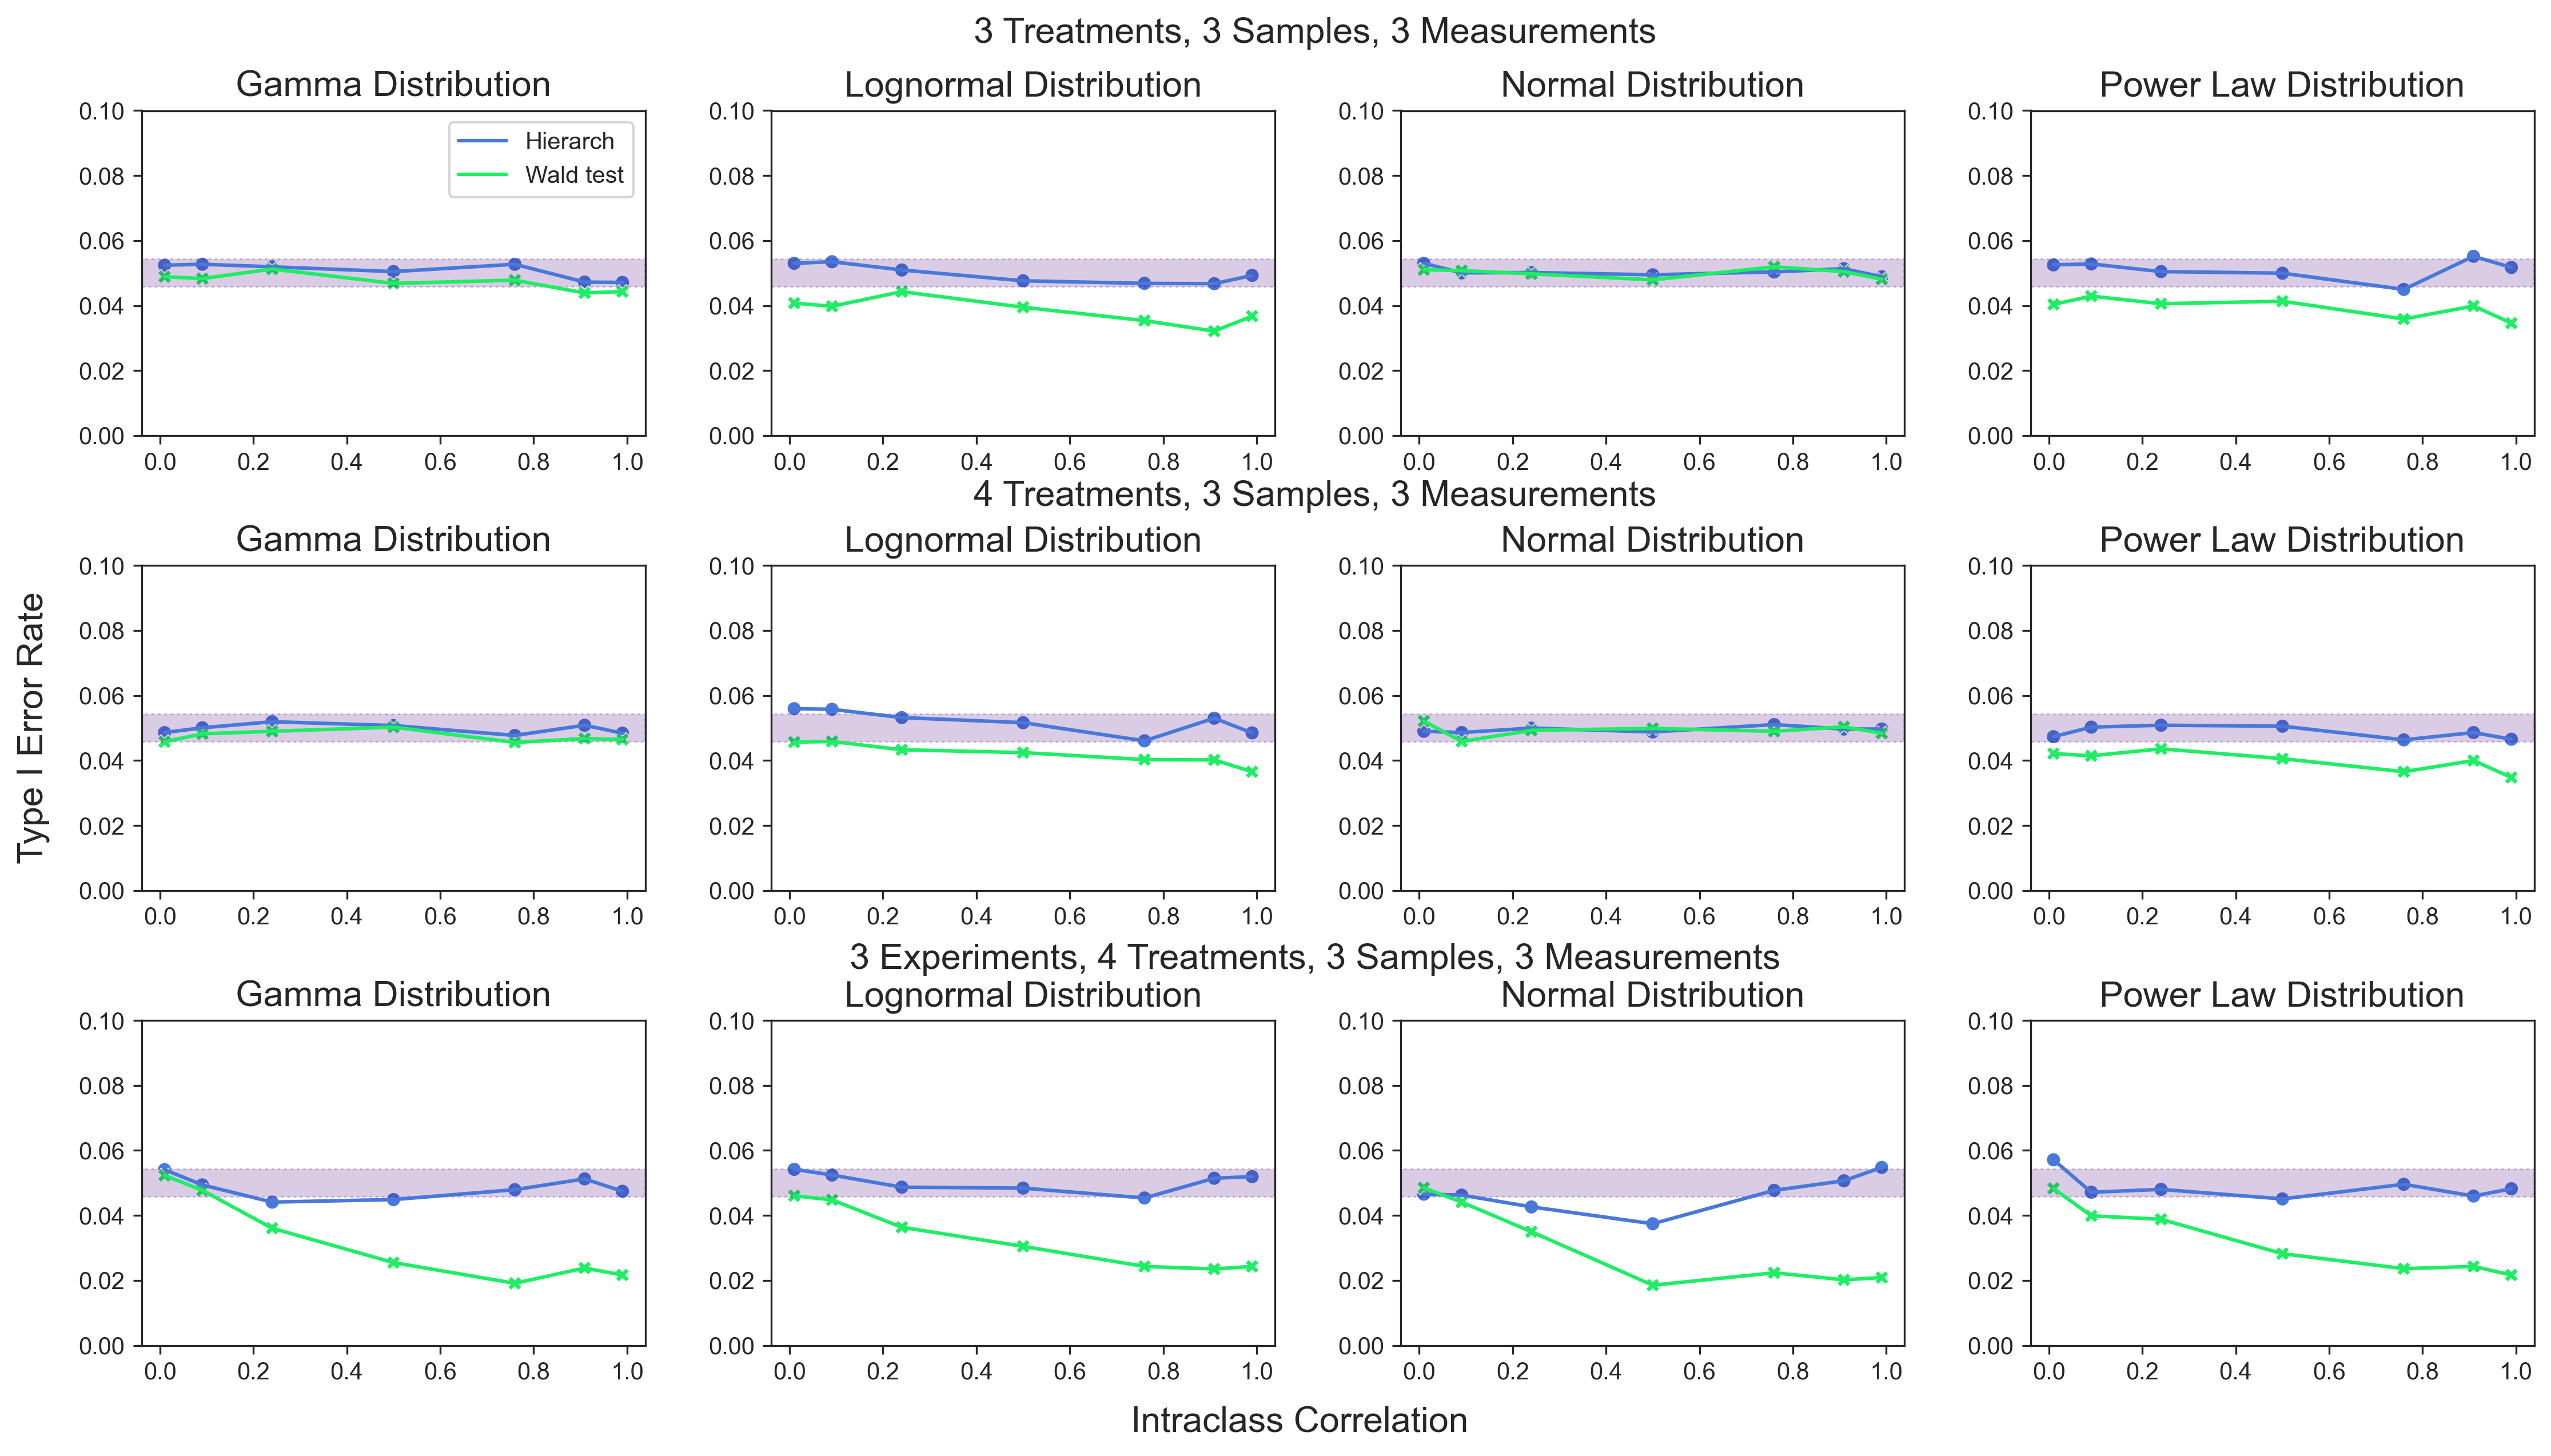

In [53]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.4)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.0, 0.1)
    axes.flat[idx].axhspan(0.0457, 0.0543, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95, "3 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, "4 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, "3 Experiments, 4 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "Intraclass Correlation", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Type I Error Rate",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 10\\figure 10.png"), dpi=300, bbox_inches="tight")

In [54]:
from pathlib import Path
import matplotlib

base_dir = Path(os.path.abspath('simulations//size control corr var'))
csvs = list(base_dir.glob('*.csv'))
csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Intraclass Correlation', 'Hierarch', "Wald test"]) for file in csvs]
for df in df_list:
    df['Intraclass Correlation'] /= (df['Intraclass Correlation'] + 1)
    df.set_index("Intraclass Correlation", inplace=True)
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

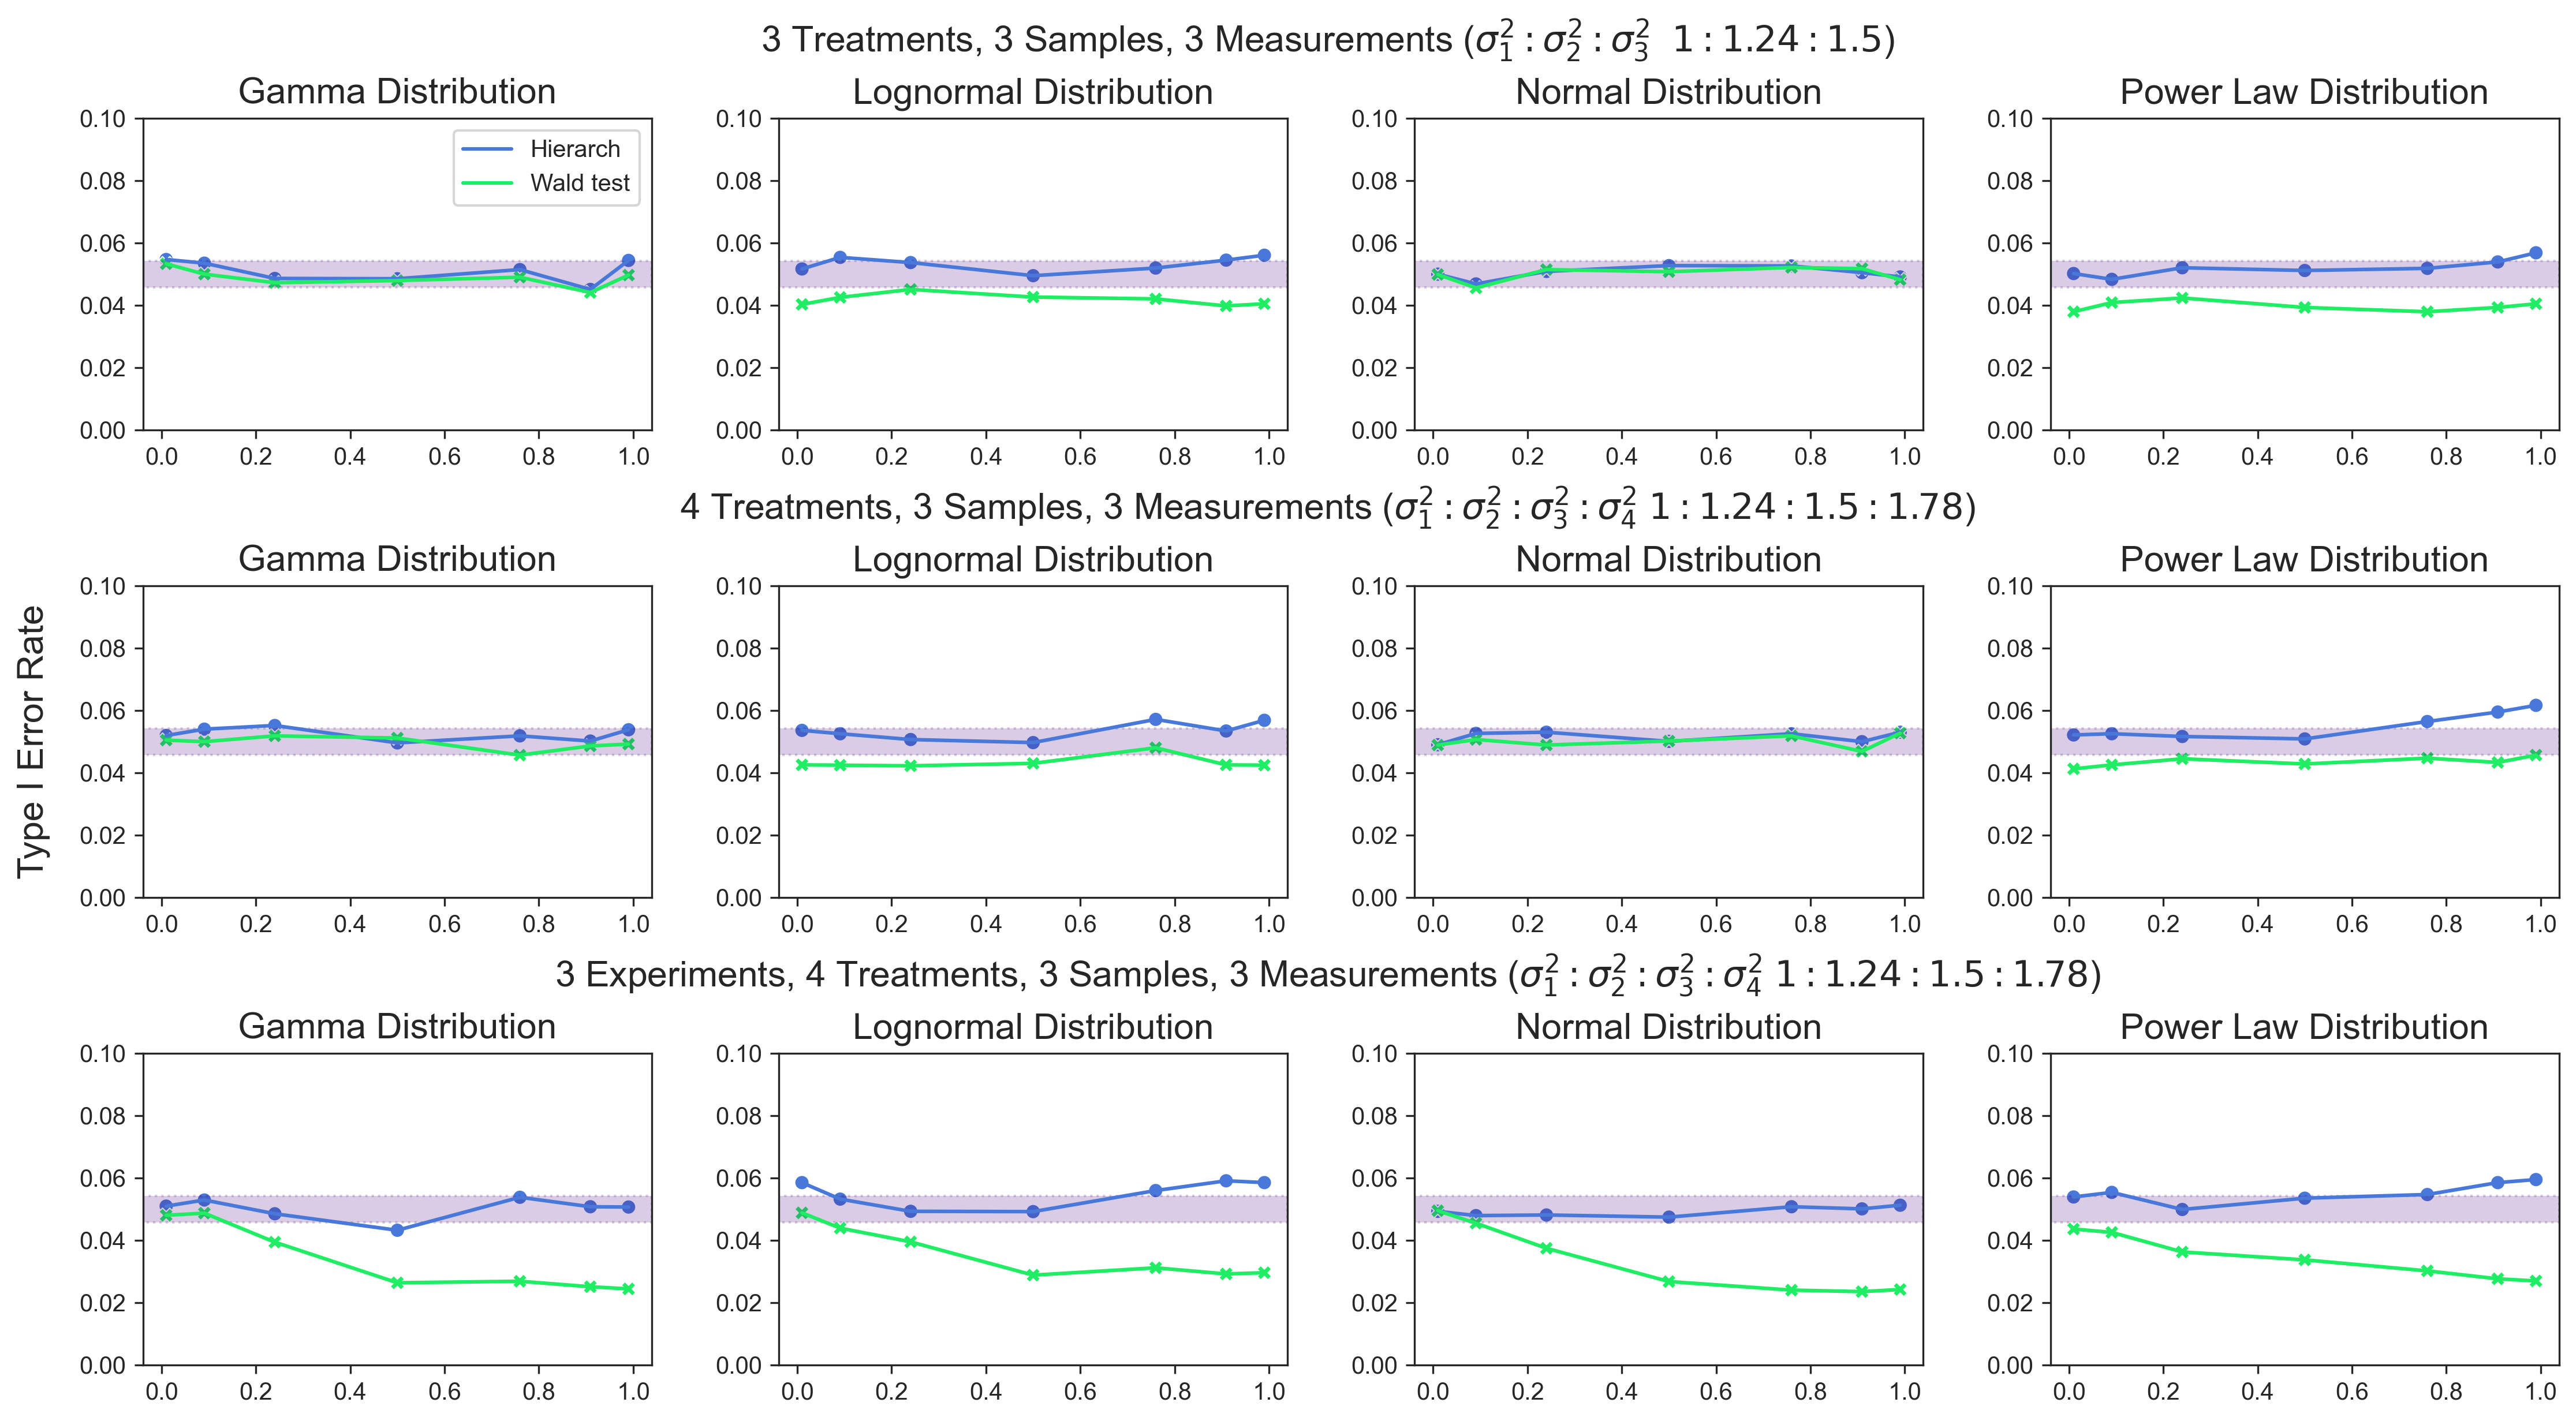

In [55]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.5)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.0, 0.1)
    axes.flat[idx].axhspan(0.0457, 0.0543, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95, r"3 Treatments, 3 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}:\sigma_3^{2}$  $1:1.24:1.5$)", ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, r"4 Treatments, 3 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}:\sigma_3^{2}:\sigma_4^{2}$ $1:1.24:1.5:1.78$)", ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, r"3 Experiments, 4 Treatments, 3 Samples, 3 Measurements ($\sigma_1^{2}:\sigma_2^{2}:\sigma_3^{2}:\sigma_4^{2}$ $1:1.24:1.5:1.78$)", ha="center", va="center", size=MEDIUM_SIZE)

f.text(
    0.09,
    0.5,
    "Type I Error Rate",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 11\\figure 11.png"), dpi=300, bbox_inches="tight")

In [56]:
from pathlib import Path

base_dir = Path(os.path.abspath('simulations//confidence intervals_t'))
csvs = list(base_dir.glob('*.csv'))
df_list = [pd.read_csv(file, names=['Effect Size', 'Hierarch', "Welch's t", "Student's t"], index_col=0) for file in csvs]
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

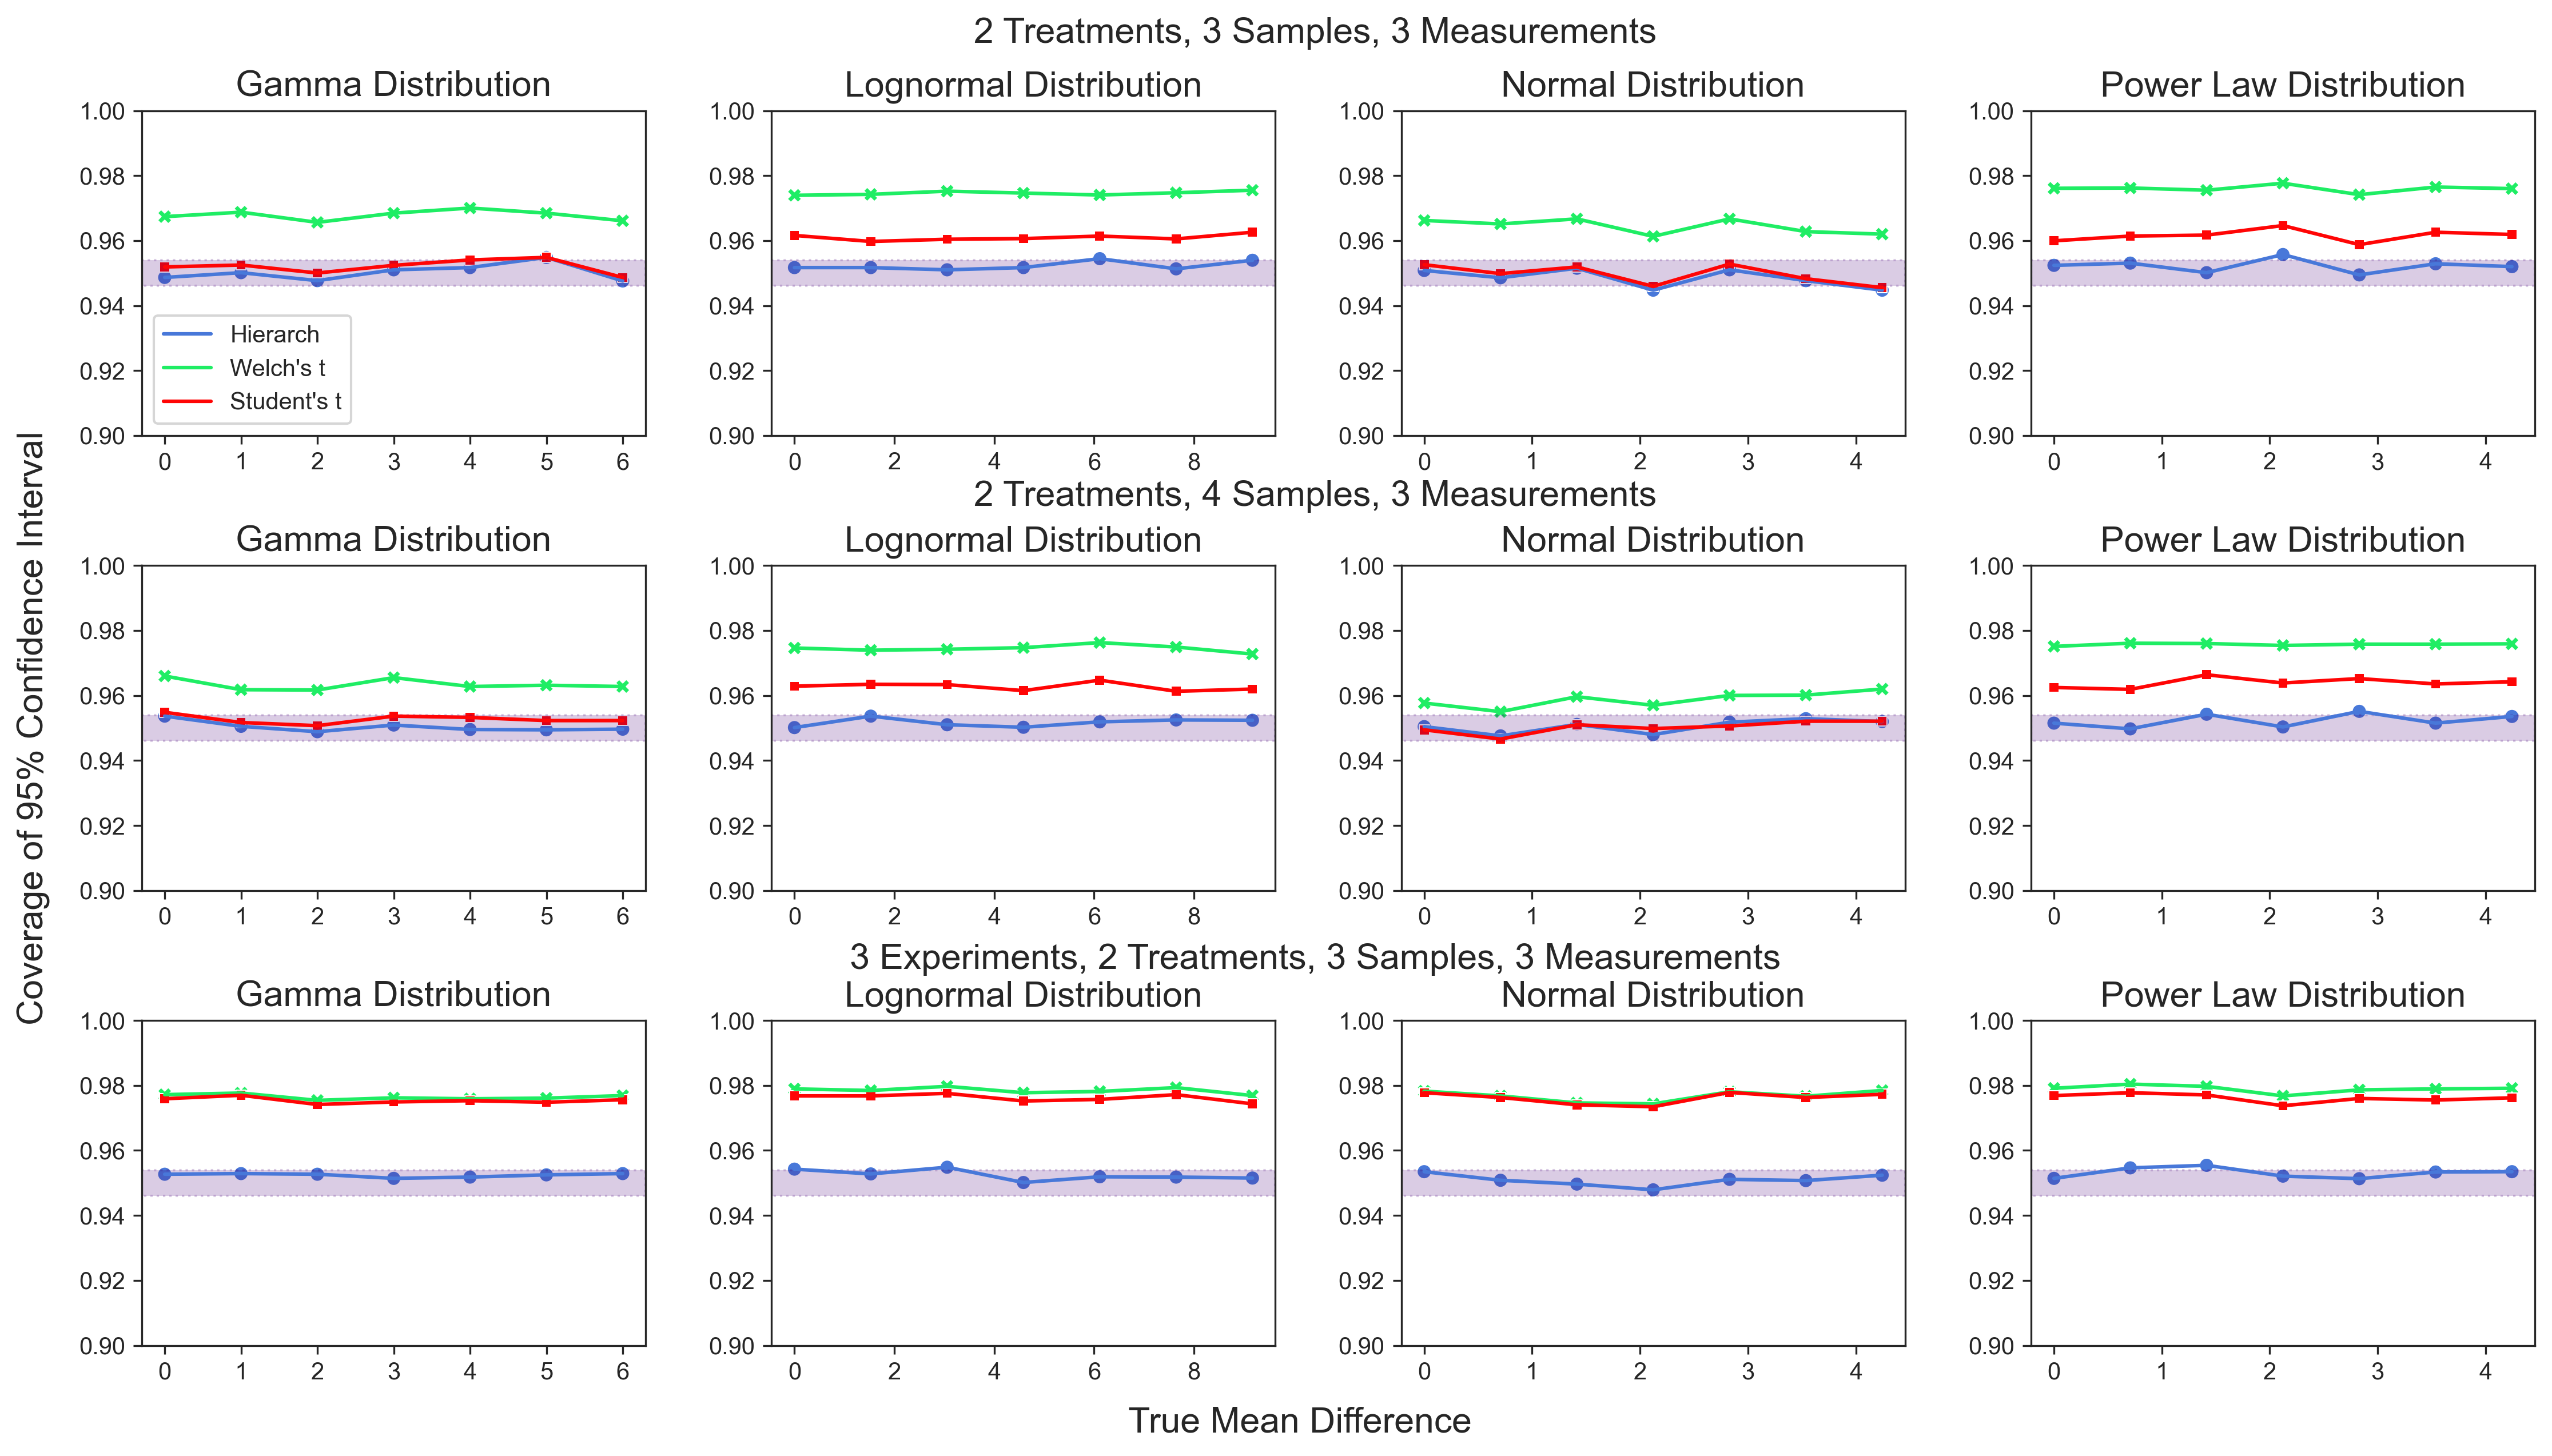

In [57]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.4)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.9, 1)
    axes.flat[idx].axhspan(0.946, 0.954, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95, "2 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, "2 Treatments, 4 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, "3 Experiments, 2 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "True Mean Difference", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Coverage of 95% Confidence Interval",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 12\\figure 12.png"), dpi=300, bbox_inches="tight")

In [58]:
from pathlib import Path

base_dir = Path(os.path.abspath('simulations//confidence intervals corr'))
csvs = list(base_dir.glob('*.csv'))
csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Effect Size', 'Hierarch', "Normal Approximation",], index_col=0) for file in csvs]
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

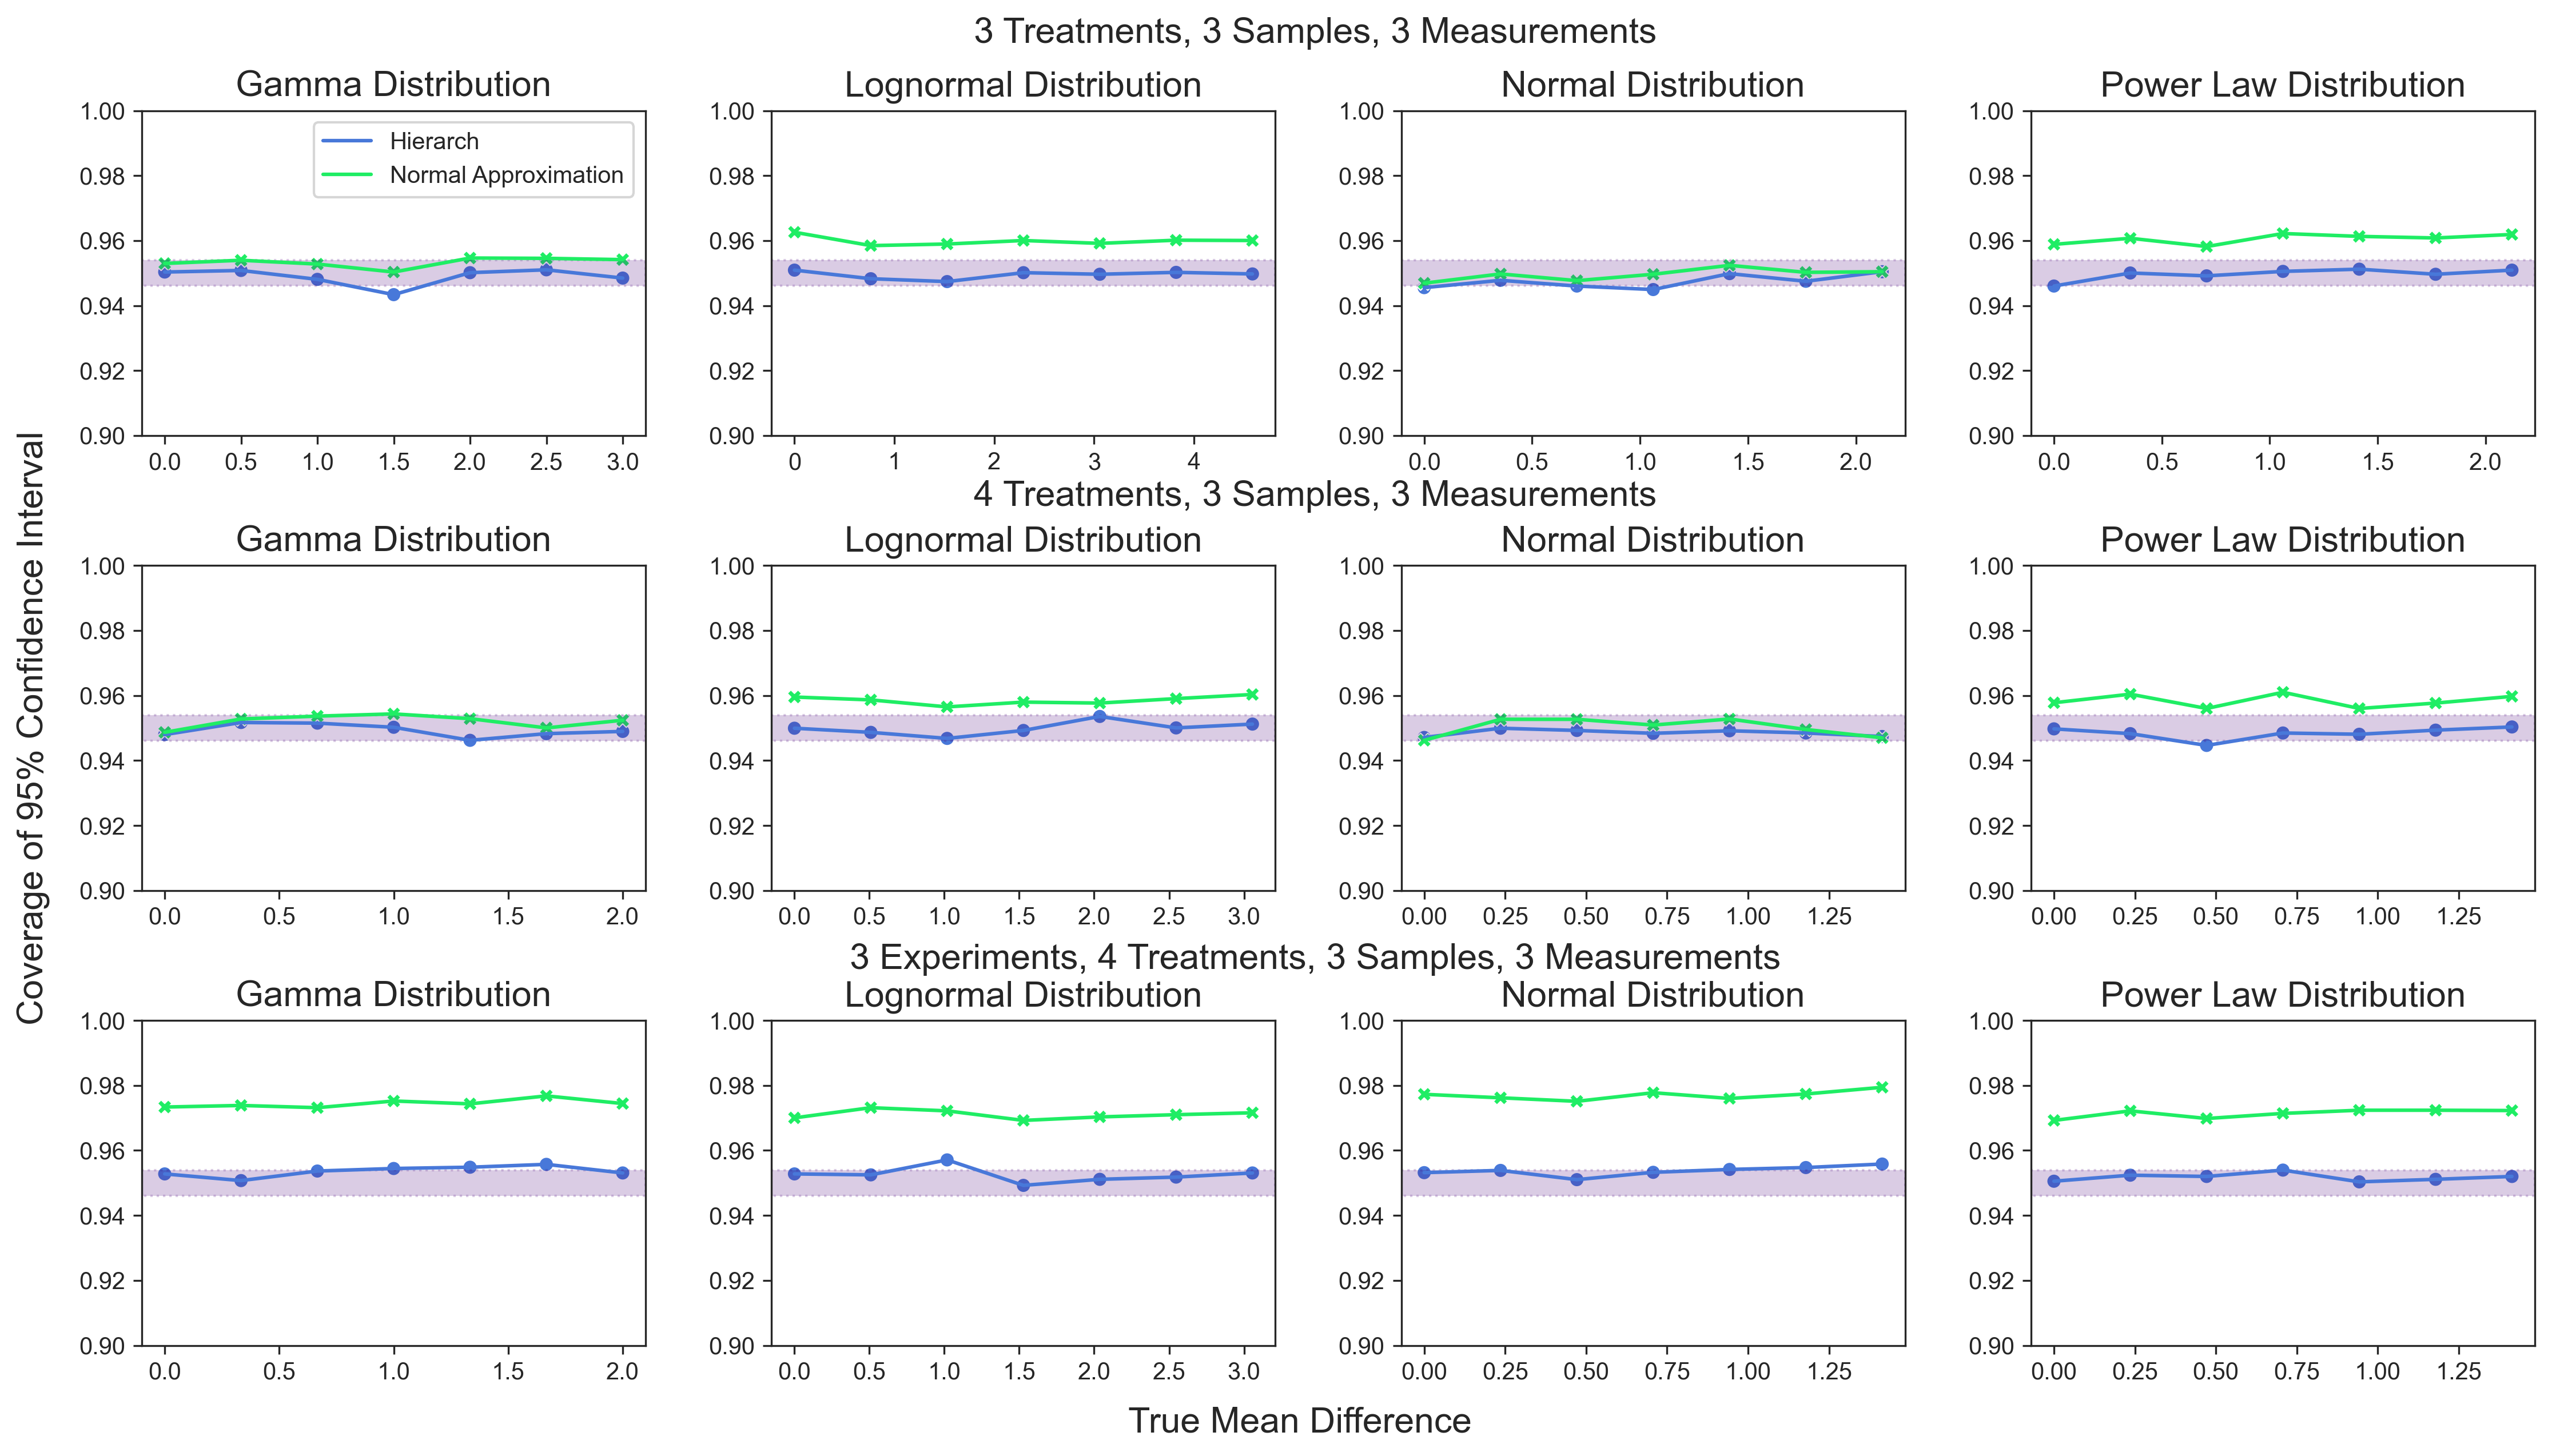

In [59]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.4)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.9, 1)
    axes.flat[idx].axhspan(0.946, 0.954, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95, "3 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, "4 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, "3 Experiments, 4 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "True Mean Difference", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Coverage of 95% Confidence Interval",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 13\\figure 13.png"), dpi=300, bbox_inches="tight")

In [2]:
from pathlib import Path

base_dir = Path(os.path.abspath('simulations//lmm'))
csvs = list(base_dir.glob('*.csv'))
csvs[4:8], csvs[8:12] = csvs[8:12], csvs[4:8]

df_list = [pd.read_csv(file, names=['Effect Size', 'Hierarch', "Linear Mixed Model",], index_col=0) for file in csvs]
plot_titles = ['Gamma Distribution', 'Lognormal Distribution', 'Normal Distribution', 'Power Law Distribution'] * 3

In [3]:

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


sns.set_style("ticks")
# sns.set(font="Times New Roman")
plt.rcParams["axes.prop_cycle"] = matplotlib.cycler(
    color=[
        "#4878d9",
        "#1fed64",
        "#ff0505",
        "#b56060",
        "#98b9fa",
        "#0b5e27",
        "#b81818",
        "#7a2d2d",
        "#3663bf",
    ]
)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = 18, 9

# plt.style.use('seaborn-white')
f, axes = plt.subplots(3, 4)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1,
                    top=0.9, wspace=0.25, hspace=0.4)

for idx, plot in np.ndenumerate(axes.flat):

    if idx[0] == 0:
        legend = 'auto'
    else:
        legend = None

    sns.lineplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        dashes=False,
        legend=legend)
    sns.scatterplot(
        data=df_list[idx[0]],
        ax=axes.flat[idx],
        legend=None)

    axes.flat[idx].set_ylabel(None)
    axes.flat[idx].set_xlabel(None)
    axes.flat[idx].set_title(plot_titles[np.sum(idx)], fontsize=MEDIUM_SIZE)
    axes.flat[idx].set_ylim(0.9, 1)
    axes.flat[idx].axhspan(0.946, 0.954, ls="dotted",
                           color="#460078", alpha=0.2)


f.text(0.505, 0.95, "3 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.65, "4 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(0.505, 0.35, "3 Experiments, 4 Treatments, 3 Samples, 3 Measurements",
       ha="center", va="center", size=MEDIUM_SIZE)
f.text(
    0.5, 0.05, "True Mean Difference", ha="center", va="center", size=MEDIUM_SIZE
)
f.text(
    0.09,
    0.5,
    "Coverage of 95% Confidence Interval",
    rotation="vertical",
    ha="center",
    va="center",
    size=MEDIUM_SIZE,
)

plt.savefig(os.path.abspath("figure 13\\figure 13.png"), dpi=300, bbox_inches="tight")

NameError: name 'matplotlib' is not defined